In [329]:
##Library initialization
import numpy as np
from tabulate import tabulate
import pandas as pd
from IPython.display import display, HTML, Markdown, Image 
import seaborn as sns
import matplotlib.pyplot as plt

In [330]:
s = ' <h1> RNA sequence declaration for calculating maximum base pair </h1>'
display(HTML(s))
# sample RNA sequence(taken from reference book and materials): ACCGGUAGU , ACAUGAUGGCCAUGU, GUCGAUUGAGCGAAUGUAACAACGUCGCUACGGCGAGA
display(Markdown('<b>Please type the seqeunce as following example:</b>'))
display(Markdown('<b> RNA Sequence example for input: ACCGGUAGU, ACAUGAUGGCCAUGU, GUCGAUUGAGCGAAUGUAACAACGUCGCUACGGCGAGA </b>'))
display(Markdown(' <b> Please insert RNA sequence </b>'))
RNA_seq = input("RNA Sequence: ")
print("\033[1m"+"Input RNA Sequence:"+str(RNA_seq)+ "\033[0m")
RNA_list = list(RNA_seq)
display(Markdown('<b> RNA sequnce converted into a list with seperated alphabates: </b>'))
print("\033[1m"+str(RNA_list)+ "\033[0m")

<b>Please type the seqeunce as following example:</b>

<b> RNA Sequence example for input: ACCGGUAGU, ACAUGAUGGCCAUGU, GUCGAUUGAGCGAAUGUAACAACGUCGCUACGGCGAGA </b>

 <b> Please insert RNA sequence </b>

RNA Sequence: GUCGAUUGAGCGAAUGUAACAACGUCGCUACGGCGAGA
Input RNA Sequence:GUCGAUUGAGCGAAUGUAACAACGUCGCUACGGCGAGA


<b> RNA sequnce converted into a list with seperated alphabates: </b>

['G', 'U', 'C', 'G', 'A', 'U', 'U', 'G', 'A', 'G', 'C', 'G', 'A', 'A', 'U', 'G', 'U', 'A', 'A', 'C', 'A', 'A', 'C', 'G', 'U', 'C', 'G', 'C', 'U', 'A', 'C', 'G', 'G', 'C', 'G', 'A', 'G', 'A']


In [337]:
def plot_map(x,max_,k=1,cmap = 'hot'):    
    sns.set()
    fig, ax = plt.subplots(figsize=(16,16))
    sns.heatmap(data = x, annot= True, linewidth = 5, vmin=0, vmax=max_, ax=ax, cbar = False, xticklabels=headers[5::1], 
                yticklabels=rowsIds[len(RNA_list)-6::-1],cmap = 'hot', annot_kws={"size": 20})
    bottom, top = ax.get_ylim()
    ax.set_title('Filling the values for k = ' + str(k),fontsize = 20)
    ax.set_ylim(bottom + 0.5, top - 0.5)

In [332]:
s = ' <h1> An empty 2d array initialization titled as OPT </h1>'
display(HTML(s))

OPT = np.zeros((len(RNA_list),len(RNA_list)))
for i in range(len(RNA_list)):
    for j in range(len(RNA_list)):
        OPT[i,j] = None
headers = []
for i in range(OPT.shape[0]):
    headers.append("j = "+str(i+1))
rowsIds = []
for i in range(OPT.shape[0]):
    rowsIds.append("i = "+str(i+1))
    
display(Markdown('<b>2d Array - OPT [i,j] </b>'))
print("\033[1m"+"here, length of RNA sequence, n = "+str(len(RNA_list))+ "\033[0m")
df = pd.DataFrame(data = OPT, columns=headers, index=rowsIds)
heading_properties = [('font-size', '18px')]

cell_properties = [('font-size', '16px')]

dfstyle = [dict(selector="th", props=heading_properties),\
 dict(selector="td", props=cell_properties)]

df.style.set_table_styles(dfstyle)

<b>2d Array - OPT [i,j] </b>

here, length of RNA sequence, n = 38


<b>A secondary structure on RNA sequence, B(a string expressing all 4 symbols{A,U,C,G}) is a set of pairs S = {(i, j)}, where i, j ∈ {1, 2, . . . , n}, that satisfies the following conditions.</b>

(i) (No sharp turns.) The ends of each pair in S are separated by at least four intervening bases; that is, if (i, j) ∈ S, then i < j − 4. (ii) The elements of any pair in S consist of either {A, U} or {C, G} (in either order). (iii) S is a matching: no base appears in more than one pair. (iv) (The noncrossing condition.) If (i, j) and (k, l) are two pairs in S, then we cannot have i < k < j < l.

Reference : Algorithm Design by Jon Kleinberg and Éva Tardos. Addison-Wesley, 2005
image reference : Algorithm Design by Jon Kleinberg and Éva Tardos. Addison-Wesley, 2005


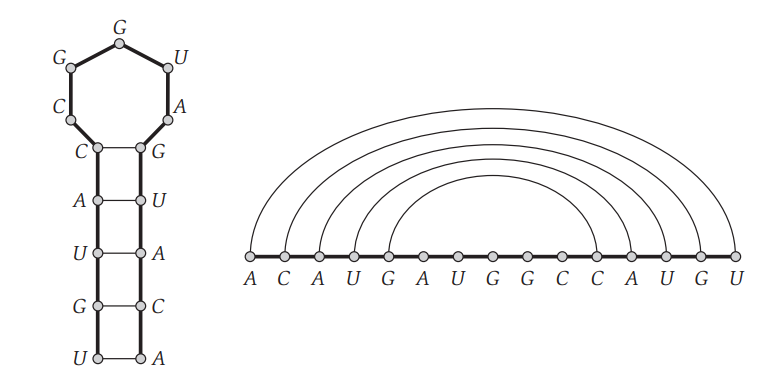

In [333]:
display(Markdown('<b>A secondary structure on RNA sequence, B(a string expressing all 4 symbols{A,U,C,G}) is a set of pairs S = {(i, j)}, where i, j ∈ {1, 2, . . . , n}, that satisfies the following conditions.</b>')) 
display(Markdown('(i) (No sharp turns.) The ends of each pair in S are separated by at least four intervening bases; that is, if (i, j) ∈ S, then i < j − 4.'
' (ii) The elements of any pair in S consist of either {A, U} or {C, G} (in either order).'
' (iii) S is a matching: no base appears in more than one pair.'
' (iv) (The noncrossing condition.) If (i, j) and (k, l) are two pairs in S, then we cannot have i < k < j < l.'))

print("Reference : Algorithm Design by Jon Kleinberg and Éva Tardos. Addison-Wesley, 2005")
print("image reference : Algorithm Design by Jon Kleinberg and Éva Tardos. Addison-Wesley, 2005")

Image(filename = "img/RNA.png")

<b>Initial Values of OPT[i,j]:</b>

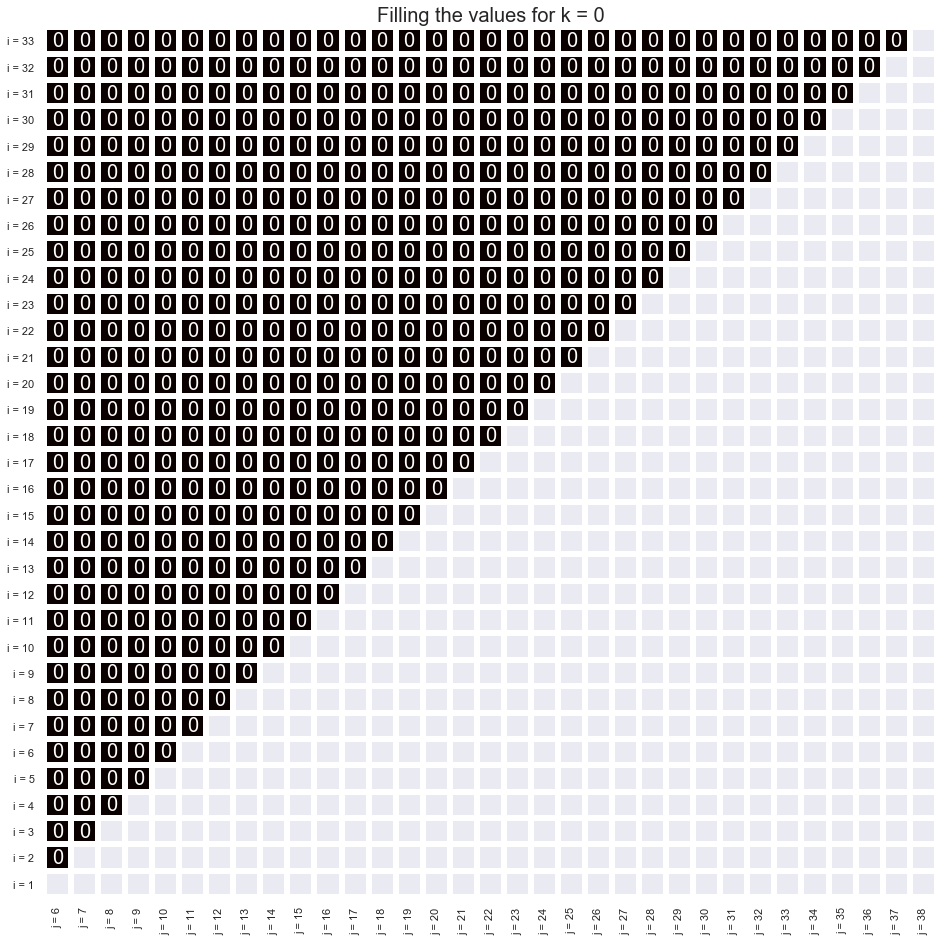

In [338]:

s1 = ' <h1> Condition 1 is being fulfilled </h1>'
display(HTML(s1))

s = ' <h1> initialization of OPT(i,j) = 0 where i >= j - 4 and i > j </h1>'
display(HTML(s))

display(Markdown('<b>Initial Values of OPT[i,j]:</b>'))
for i in range(0,OPT.shape[0]):
    for j in range(0,OPT.shape[1]):
        if (i >= j-4 or i>j):
            OPT[i,j] = 0
# df = pd.DataFrame(data = OPT, columns=headers, index=rowsIds)
# df.style.set_table_styles(dfstyle)
plot_map(OPT[len(RNA_list)-6::-1,5::1],np.nanmax(OPT),0,cmap = 'hot')

# plot_map(OPT,np.amax(OPT))

Let, OPT[i,j] express the max number of possible base pairs in the RNA structure b = [bi...bj]. Two cases can arise in the structure

(i) j is not involved in any pair,then OPT[i,j] = OPT[i,j-1]

(ii) j creates pair with t for t<j-4.As depicted in the figure, we see two independent subproblems OPT[i,t-1] ans OPT[t+1,j-1]

Final recurrence equation: OPT[i,j] = max(OPT[i,j-1],max_t(1+OPT[i,t-1]+OPT[t+1,j-1]), where max is taken over t with all conditions satisfied

Reference : Algorithm Design by Jon Kleinberg and Éva Tardos. Addison-Wesley, 2005
image reference : Algorithm Design by Jon Kleinberg and Éva Tardos. Addison-Wesley, 2005


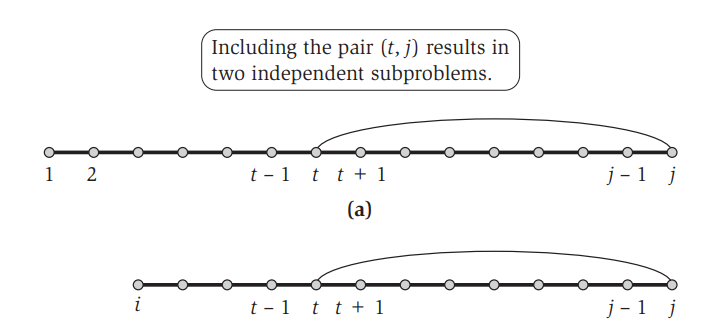

In [339]:
display(Markdown('Let, OPT[i,j] express the max number of possible base pairs in the RNA structure b = [bi...bj]. Two cases can arise in the structure'))
display(Markdown('(i) j is not involved in any pair,then OPT[i,j] = OPT[i,j-1]'))
display(Markdown('(ii) j creates pair with t for t<j-4.As depicted in the figure, we see two independent subproblems OPT[i,t-1] ans OPT[t+1,j-1]'))
display(Markdown('Final recurrence equation: OPT[i,j] = max(OPT[i,j-1],max_t(1+OPT[i,t-1]+OPT[t+1,j-1]), where max is taken over t with all conditions satisfied'))
print("Reference : Algorithm Design by Jon Kleinberg and Éva Tardos. Addison-Wesley, 2005")
print("image reference : Algorithm Design by Jon Kleinberg and Éva Tardos. Addison-Wesley, 2005")

Image(filename = "img/pair.png")

For k = 5
OPT[i,j] = OPT[1,6]
	 j is 6 and j-th symbol is U .j is not involved in the pair because no base-pair is found
	 OPT[i,j] = OPT[i,j-1]
OPT[i,j] = OPT[2,7]
	 j is 7 and j-th symbol is U .j is not involved in the pair because no base-pair is found
	 OPT[i,j] = OPT[i,j-1]
OPT[i,j] = OPT[3,8]
	 j is 8 and j-th symbol is G .j pairs with t for t<j-4. recurrence on two subproblems OPT[i,t-1] and OPT[t+1,j-1]
	 OPT[i,j] = max_t(1 + OPT[i,t-1] +OPT[t+1,j-1]
OPT[i,j] = OPT[4,9]
	 j is 9 and j-th symbol is A .j is not involved in the pair because no base-pair is found
	 OPT[i,j] = OPT[i,j-1]
OPT[i,j] = OPT[5,10]
	 j is 10 and j-th symbol is G .j is not involved in the pair because no base-pair is found
	 OPT[i,j] = OPT[i,j-1]
OPT[i,j] = OPT[6,11]
	 j is 11 and j-th symbol is C .j is not involved in the pair because no base-pair is found
	 OPT[i,j] = OPT[i,j-1]
OPT[i,j] = OPT[7,12]
	 j is 12 and j-th symbol is G .j is not involved in the pair because no base-pair is found
	 OPT[i,j] = OP

For k = 7
OPT[i,j] = OPT[1,8]
	 j is 8 and j-th symbol is G .j pairs with t for t<j-4. recurrence on two subproblems OPT[i,t-1] and OPT[t+1,j-1]
	 OPT[i,j] = max_t(1 + OPT[i,t-1] +OPT[t+1,j-1]
OPT[i,j] = OPT[2,9]
	 j is 9 and j-th symbol is A .j pairs with t for t<j-4. recurrence on two subproblems OPT[i,t-1] and OPT[t+1,j-1]
	 OPT[i,j] = max_t(1 + OPT[i,t-1] +OPT[t+1,j-1]
OPT[i,j] = OPT[3,10]
	 j is 10 and j-th symbol is G .j pairs with t for t<j-4. recurrence on two subproblems OPT[i,t-1] and OPT[t+1,j-1]
	 OPT[i,j] = max_t(1 + OPT[i,t-1] +OPT[t+1,j-1]
OPT[i,j] = OPT[4,11]
	 j is 11 and j-th symbol is C .j pairs with t for t<j-4. recurrence on two subproblems OPT[i,t-1] and OPT[t+1,j-1]
	 OPT[i,j] = max_t(1 + OPT[i,t-1] +OPT[t+1,j-1]
OPT[i,j] = OPT[5,12]
	 j is 12 and j-th symbol is G .j is not involved in the pair because no base-pair is found
	 OPT[i,j] = OPT[i,j-1]
OPT[i,j] = OPT[6,13]
	 j is 13 and j-th symbol is A .j pairs with t for t<j-4. recurrence on two subproblems OPT[i,t-

For k = 9
OPT[i,j] = OPT[1,10]
	 j is 10 and j-th symbol is G .j pairs with t for t<j-4. recurrence on two subproblems OPT[i,t-1] and OPT[t+1,j-1]
	 OPT[i,j] = max_t(1 + OPT[i,t-1] +OPT[t+1,j-1]
OPT[i,j] = OPT[2,11]
	 j is 11 and j-th symbol is C .j pairs with t for t<j-4. recurrence on two subproblems OPT[i,t-1] and OPT[t+1,j-1]
	 OPT[i,j] = max_t(1 + OPT[i,t-1] +OPT[t+1,j-1]
OPT[i,j] = OPT[3,12]
	 j is 12 and j-th symbol is G .j pairs with t for t<j-4. recurrence on two subproblems OPT[i,t-1] and OPT[t+1,j-1]
	 OPT[i,j] = max_t(1 + OPT[i,t-1] +OPT[t+1,j-1]
OPT[i,j] = OPT[4,13]
	 j is 13 and j-th symbol is A .j pairs with t for t<j-4. recurrence on two subproblems OPT[i,t-1] and OPT[t+1,j-1]
	 OPT[i,j] = max_t(1 + OPT[i,t-1] +OPT[t+1,j-1]
OPT[i,j] = OPT[5,14]
	 j is 14 and j-th symbol is A .j pairs with t for t<j-4. recurrence on two subproblems OPT[i,t-1] and OPT[t+1,j-1]
	 OPT[i,j] = max_t(1 + OPT[i,t-1] +OPT[t+1,j-1]
OPT[i,j] = OPT[6,15]
	 j is 15 and j-th symbol is U .j pairs with

For k = 11
OPT[i,j] = OPT[1,12]
	 j is 12 and j-th symbol is G .j pairs with t for t<j-4. recurrence on two subproblems OPT[i,t-1] and OPT[t+1,j-1]
	 OPT[i,j] = max_t(1 + OPT[i,t-1] +OPT[t+1,j-1]
OPT[i,j] = OPT[2,13]
	 j is 13 and j-th symbol is A .j pairs with t for t<j-4. recurrence on two subproblems OPT[i,t-1] and OPT[t+1,j-1]
	 OPT[i,j] = max_t(1 + OPT[i,t-1] +OPT[t+1,j-1]
OPT[i,j] = OPT[3,14]
	 j is 14 and j-th symbol is A .j pairs with t for t<j-4. recurrence on two subproblems OPT[i,t-1] and OPT[t+1,j-1]
	 OPT[i,j] = max_t(1 + OPT[i,t-1] +OPT[t+1,j-1]
OPT[i,j] = OPT[4,15]
	 j is 15 and j-th symbol is U .j pairs with t for t<j-4. recurrence on two subproblems OPT[i,t-1] and OPT[t+1,j-1]
	 OPT[i,j] = max_t(1 + OPT[i,t-1] +OPT[t+1,j-1]
OPT[i,j] = OPT[5,16]
	 j is 16 and j-th symbol is G .j pairs with t for t<j-4. recurrence on two subproblems OPT[i,t-1] and OPT[t+1,j-1]
	 OPT[i,j] = max_t(1 + OPT[i,t-1] +OPT[t+1,j-1]
OPT[i,j] = OPT[6,17]
	 j is 17 and j-th symbol is U .j pairs wit

For k = 13
OPT[i,j] = OPT[1,14]
	 j is 14 and j-th symbol is A .j pairs with t for t<j-4. recurrence on two subproblems OPT[i,t-1] and OPT[t+1,j-1]
	 OPT[i,j] = max_t(1 + OPT[i,t-1] +OPT[t+1,j-1]
OPT[i,j] = OPT[2,15]
	 j is 15 and j-th symbol is U .j pairs with t for t<j-4. recurrence on two subproblems OPT[i,t-1] and OPT[t+1,j-1]
	 OPT[i,j] = max_t(1 + OPT[i,t-1] +OPT[t+1,j-1]
OPT[i,j] = OPT[3,16]
	 j is 16 and j-th symbol is G .j pairs with t for t<j-4. recurrence on two subproblems OPT[i,t-1] and OPT[t+1,j-1]
	 OPT[i,j] = max_t(1 + OPT[i,t-1] +OPT[t+1,j-1]
OPT[i,j] = OPT[4,17]
	 j is 17 and j-th symbol is U .j pairs with t for t<j-4. recurrence on two subproblems OPT[i,t-1] and OPT[t+1,j-1]
	 OPT[i,j] = max_t(1 + OPT[i,t-1] +OPT[t+1,j-1]
OPT[i,j] = OPT[5,18]
	 j is 18 and j-th symbol is A .j pairs with t for t<j-4. recurrence on two subproblems OPT[i,t-1] and OPT[t+1,j-1]
	 OPT[i,j] = max_t(1 + OPT[i,t-1] +OPT[t+1,j-1]
OPT[i,j] = OPT[6,19]
	 j is 19 and j-th symbol is A .j pairs wit

For k = 15
OPT[i,j] = OPT[1,16]
	 j is 16 and j-th symbol is G .j pairs with t for t<j-4. recurrence on two subproblems OPT[i,t-1] and OPT[t+1,j-1]
	 OPT[i,j] = max_t(1 + OPT[i,t-1] +OPT[t+1,j-1]
OPT[i,j] = OPT[2,17]
	 j is 17 and j-th symbol is U .j pairs with t for t<j-4. recurrence on two subproblems OPT[i,t-1] and OPT[t+1,j-1]
	 OPT[i,j] = max_t(1 + OPT[i,t-1] +OPT[t+1,j-1]
OPT[i,j] = OPT[3,18]
	 j is 18 and j-th symbol is A .j pairs with t for t<j-4. recurrence on two subproblems OPT[i,t-1] and OPT[t+1,j-1]
	 OPT[i,j] = max_t(1 + OPT[i,t-1] +OPT[t+1,j-1]
OPT[i,j] = OPT[4,19]
	 j is 19 and j-th symbol is A .j pairs with t for t<j-4. recurrence on two subproblems OPT[i,t-1] and OPT[t+1,j-1]
	 OPT[i,j] = max_t(1 + OPT[i,t-1] +OPT[t+1,j-1]
OPT[i,j] = OPT[5,20]
	 j is 20 and j-th symbol is C .j pairs with t for t<j-4. recurrence on two subproblems OPT[i,t-1] and OPT[t+1,j-1]
	 OPT[i,j] = max_t(1 + OPT[i,t-1] +OPT[t+1,j-1]
OPT[i,j] = OPT[6,21]
	 j is 21 and j-th symbol is A .j pairs wit

For k = 17
OPT[i,j] = OPT[1,18]
	 j is 18 and j-th symbol is A .j pairs with t for t<j-4. recurrence on two subproblems OPT[i,t-1] and OPT[t+1,j-1]
	 OPT[i,j] = max_t(1 + OPT[i,t-1] +OPT[t+1,j-1]
OPT[i,j] = OPT[2,19]
	 j is 19 and j-th symbol is A .j pairs with t for t<j-4. recurrence on two subproblems OPT[i,t-1] and OPT[t+1,j-1]
	 OPT[i,j] = max_t(1 + OPT[i,t-1] +OPT[t+1,j-1]
OPT[i,j] = OPT[3,20]
	 j is 20 and j-th symbol is C .j pairs with t for t<j-4. recurrence on two subproblems OPT[i,t-1] and OPT[t+1,j-1]
	 OPT[i,j] = max_t(1 + OPT[i,t-1] +OPT[t+1,j-1]
OPT[i,j] = OPT[4,21]
	 j is 21 and j-th symbol is A .j pairs with t for t<j-4. recurrence on two subproblems OPT[i,t-1] and OPT[t+1,j-1]
	 OPT[i,j] = max_t(1 + OPT[i,t-1] +OPT[t+1,j-1]
OPT[i,j] = OPT[5,22]
	 j is 22 and j-th symbol is A .j pairs with t for t<j-4. recurrence on two subproblems OPT[i,t-1] and OPT[t+1,j-1]
	 OPT[i,j] = max_t(1 + OPT[i,t-1] +OPT[t+1,j-1]
OPT[i,j] = OPT[6,23]
	 j is 23 and j-th symbol is C .j pairs wit

For k = 20
OPT[i,j] = OPT[1,21]
	 j is 21 and j-th symbol is A .j pairs with t for t<j-4. recurrence on two subproblems OPT[i,t-1] and OPT[t+1,j-1]
	 OPT[i,j] = max_t(1 + OPT[i,t-1] +OPT[t+1,j-1]
OPT[i,j] = OPT[2,22]
	 j is 22 and j-th symbol is A .j pairs with t for t<j-4. recurrence on two subproblems OPT[i,t-1] and OPT[t+1,j-1]
	 OPT[i,j] = max_t(1 + OPT[i,t-1] +OPT[t+1,j-1]
OPT[i,j] = OPT[3,23]
	 j is 23 and j-th symbol is C .j pairs with t for t<j-4. recurrence on two subproblems OPT[i,t-1] and OPT[t+1,j-1]
	 OPT[i,j] = max_t(1 + OPT[i,t-1] +OPT[t+1,j-1]
OPT[i,j] = OPT[4,24]
	 j is 24 and j-th symbol is G .j pairs with t for t<j-4. recurrence on two subproblems OPT[i,t-1] and OPT[t+1,j-1]
	 OPT[i,j] = max_t(1 + OPT[i,t-1] +OPT[t+1,j-1]
OPT[i,j] = OPT[5,25]
	 j is 25 and j-th symbol is U .j pairs with t for t<j-4. recurrence on two subproblems OPT[i,t-1] and OPT[t+1,j-1]
	 OPT[i,j] = max_t(1 + OPT[i,t-1] +OPT[t+1,j-1]
OPT[i,j] = OPT[6,26]
	 j is 26 and j-th symbol is C .j pairs wit

For k = 23
OPT[i,j] = OPT[1,24]
	 j is 24 and j-th symbol is G .j pairs with t for t<j-4. recurrence on two subproblems OPT[i,t-1] and OPT[t+1,j-1]
	 OPT[i,j] = max_t(1 + OPT[i,t-1] +OPT[t+1,j-1]
OPT[i,j] = OPT[2,25]
	 j is 25 and j-th symbol is U .j pairs with t for t<j-4. recurrence on two subproblems OPT[i,t-1] and OPT[t+1,j-1]
	 OPT[i,j] = max_t(1 + OPT[i,t-1] +OPT[t+1,j-1]
OPT[i,j] = OPT[3,26]
	 j is 26 and j-th symbol is C .j pairs with t for t<j-4. recurrence on two subproblems OPT[i,t-1] and OPT[t+1,j-1]
	 OPT[i,j] = max_t(1 + OPT[i,t-1] +OPT[t+1,j-1]
OPT[i,j] = OPT[4,27]
	 j is 27 and j-th symbol is G .j pairs with t for t<j-4. recurrence on two subproblems OPT[i,t-1] and OPT[t+1,j-1]
	 OPT[i,j] = max_t(1 + OPT[i,t-1] +OPT[t+1,j-1]
OPT[i,j] = OPT[5,28]
	 j is 28 and j-th symbol is C .j pairs with t for t<j-4. recurrence on two subproblems OPT[i,t-1] and OPT[t+1,j-1]
	 OPT[i,j] = max_t(1 + OPT[i,t-1] +OPT[t+1,j-1]
OPT[i,j] = OPT[6,29]
	 j is 29 and j-th symbol is U .j pairs wit

c:\users\apand\anaconda3\envs\mytfenv\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


For k = 26
OPT[i,j] = OPT[1,27]
	 j is 27 and j-th symbol is G .j pairs with t for t<j-4. recurrence on two subproblems OPT[i,t-1] and OPT[t+1,j-1]
	 OPT[i,j] = max_t(1 + OPT[i,t-1] +OPT[t+1,j-1]
OPT[i,j] = OPT[2,28]
	 j is 28 and j-th symbol is C .j pairs with t for t<j-4. recurrence on two subproblems OPT[i,t-1] and OPT[t+1,j-1]
	 OPT[i,j] = max_t(1 + OPT[i,t-1] +OPT[t+1,j-1]
OPT[i,j] = OPT[3,29]
	 j is 29 and j-th symbol is U .j pairs with t for t<j-4. recurrence on two subproblems OPT[i,t-1] and OPT[t+1,j-1]
	 OPT[i,j] = max_t(1 + OPT[i,t-1] +OPT[t+1,j-1]
OPT[i,j] = OPT[4,30]
	 j is 30 and j-th symbol is A .j pairs with t for t<j-4. recurrence on two subproblems OPT[i,t-1] and OPT[t+1,j-1]
	 OPT[i,j] = max_t(1 + OPT[i,t-1] +OPT[t+1,j-1]
OPT[i,j] = OPT[5,31]
	 j is 31 and j-th symbol is C .j pairs with t for t<j-4. recurrence on two subproblems OPT[i,t-1] and OPT[t+1,j-1]
	 OPT[i,j] = max_t(1 + OPT[i,t-1] +OPT[t+1,j-1]
OPT[i,j] = OPT[6,32]
	 j is 32 and j-th symbol is G .j pairs wit

For k = 31
OPT[i,j] = OPT[1,32]
	 j is 32 and j-th symbol is G .j pairs with t for t<j-4. recurrence on two subproblems OPT[i,t-1] and OPT[t+1,j-1]
	 OPT[i,j] = max_t(1 + OPT[i,t-1] +OPT[t+1,j-1]
OPT[i,j] = OPT[2,33]
	 j is 33 and j-th symbol is G .j pairs with t for t<j-4. recurrence on two subproblems OPT[i,t-1] and OPT[t+1,j-1]
	 OPT[i,j] = max_t(1 + OPT[i,t-1] +OPT[t+1,j-1]
OPT[i,j] = OPT[3,34]
	 j is 34 and j-th symbol is C .j pairs with t for t<j-4. recurrence on two subproblems OPT[i,t-1] and OPT[t+1,j-1]
	 OPT[i,j] = max_t(1 + OPT[i,t-1] +OPT[t+1,j-1]
OPT[i,j] = OPT[4,35]
	 j is 35 and j-th symbol is G .j pairs with t for t<j-4. recurrence on two subproblems OPT[i,t-1] and OPT[t+1,j-1]
	 OPT[i,j] = max_t(1 + OPT[i,t-1] +OPT[t+1,j-1]
OPT[i,j] = OPT[5,36]
	 j is 36 and j-th symbol is A .j pairs with t for t<j-4. recurrence on two subproblems OPT[i,t-1] and OPT[t+1,j-1]
	 OPT[i,j] = max_t(1 + OPT[i,t-1] +OPT[t+1,j-1]
OPT[i,j] = OPT[6,37]
	 j is 37 and j-th symbol is G .j pairs wit

 <b> Maximum number of pairs possible in the RNA Structure : </b>11.0

<b> The iterations of the algorithm showing solutions to subproblems on the input sequence of the RNA Secondary Structure Prediction Problem </b>

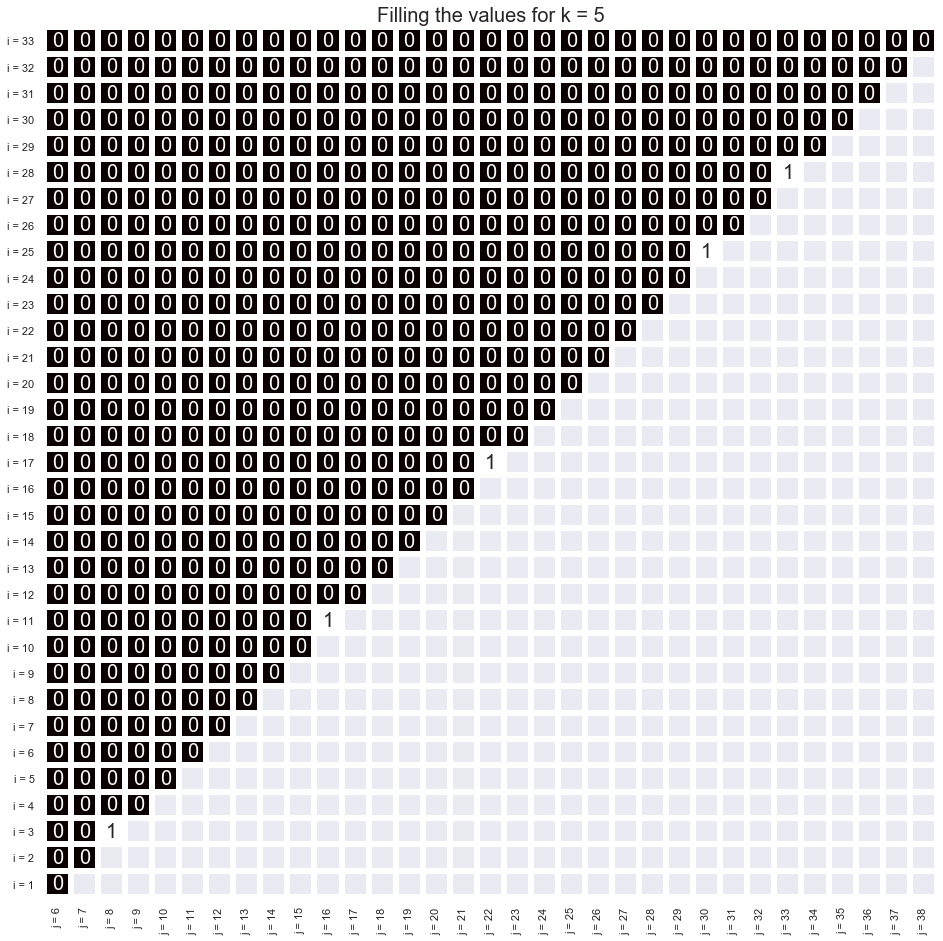

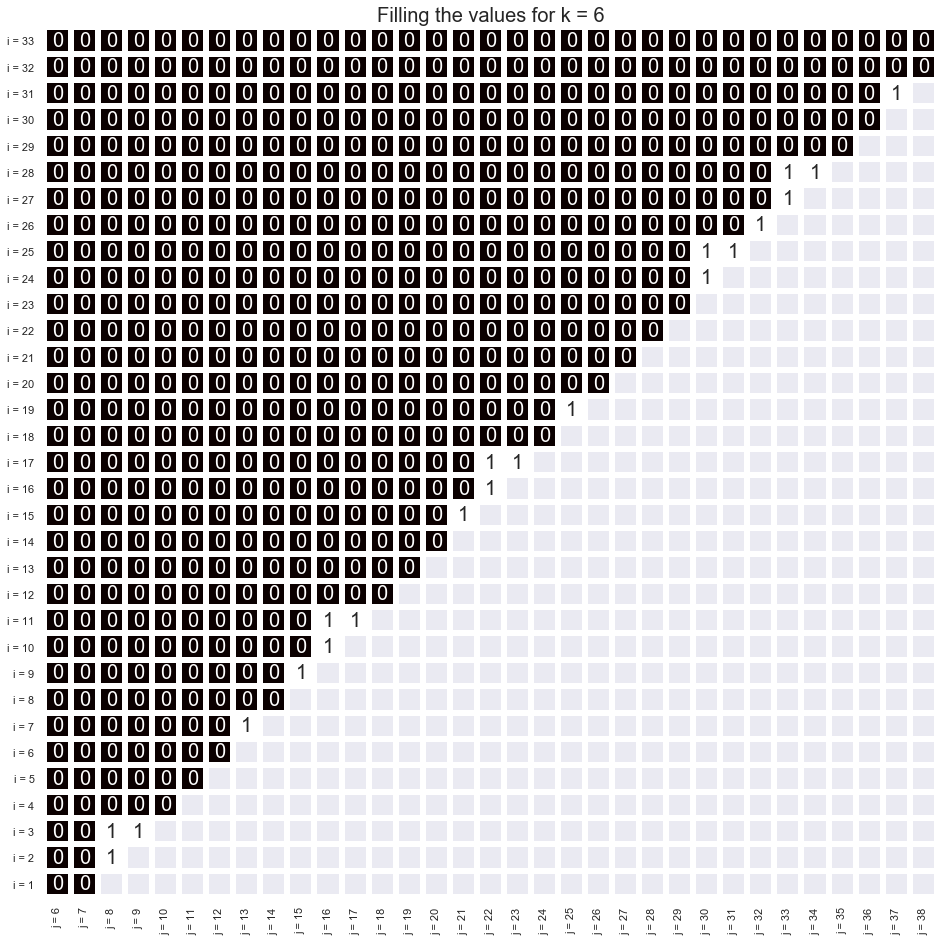

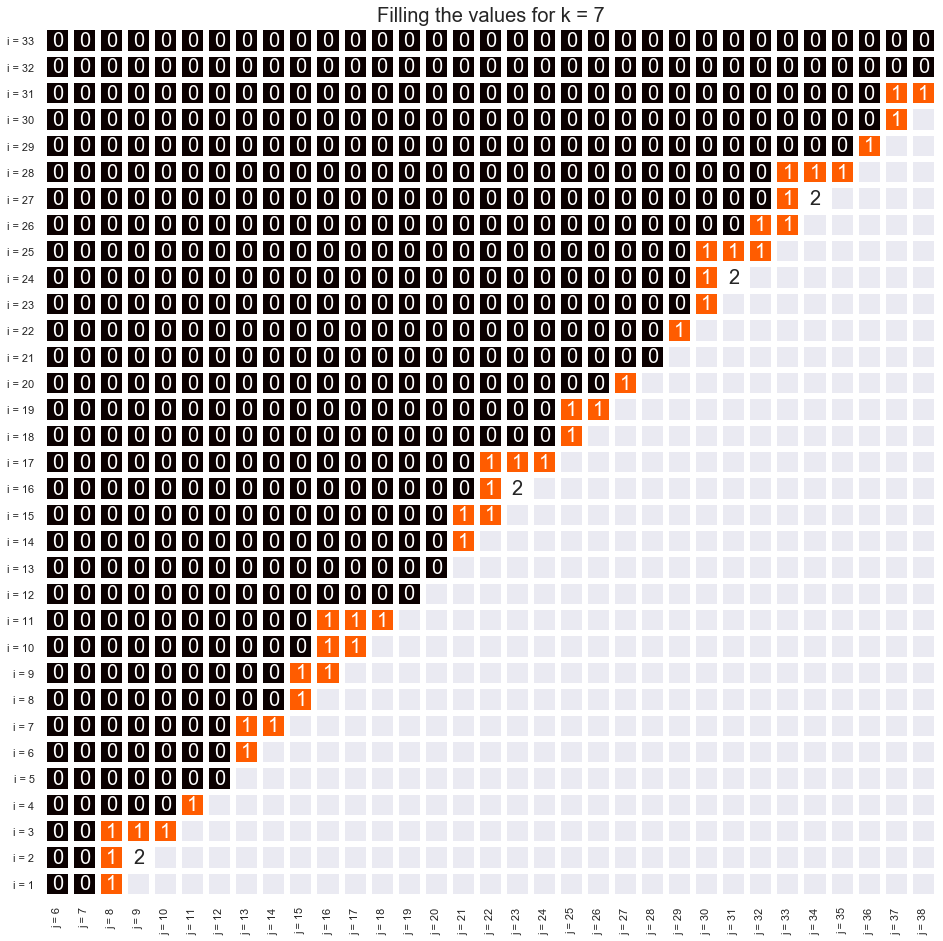

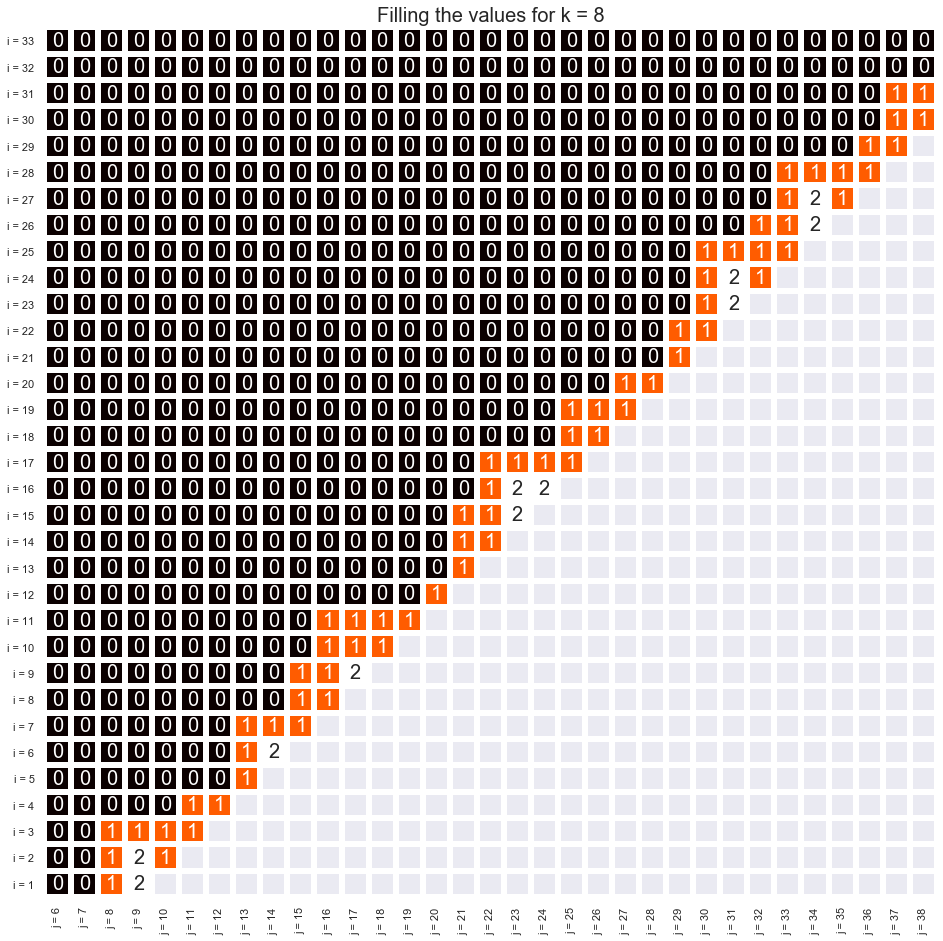

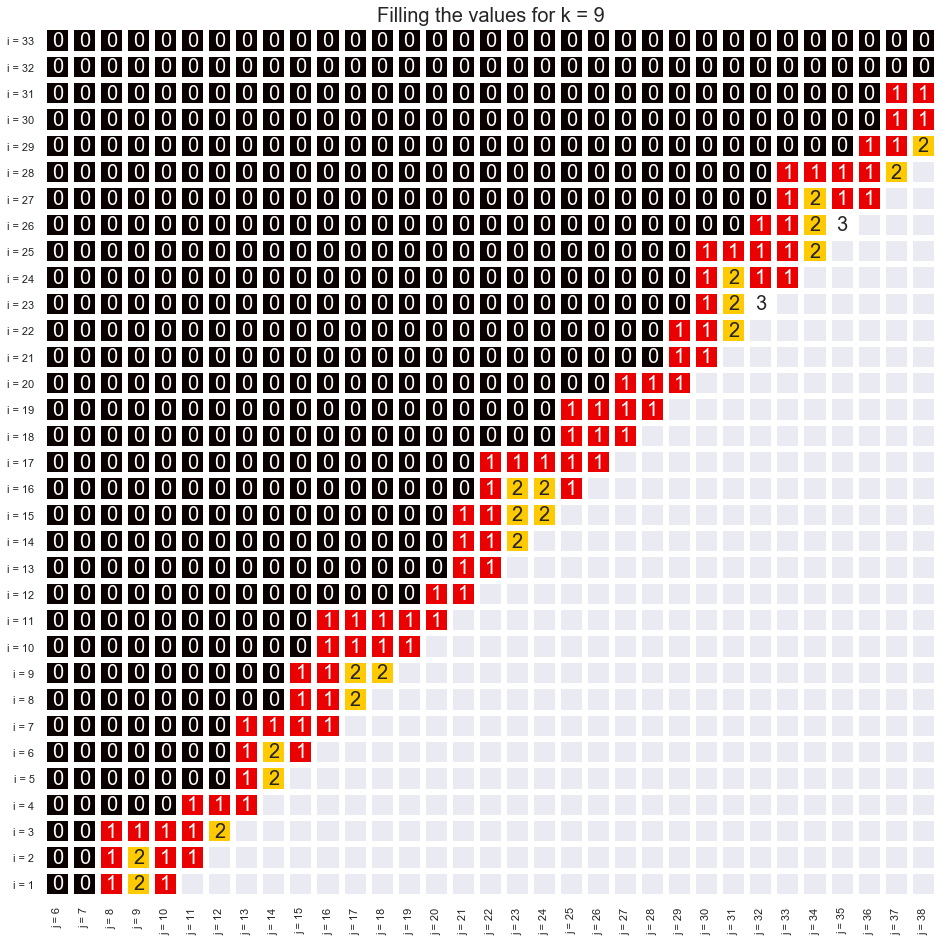

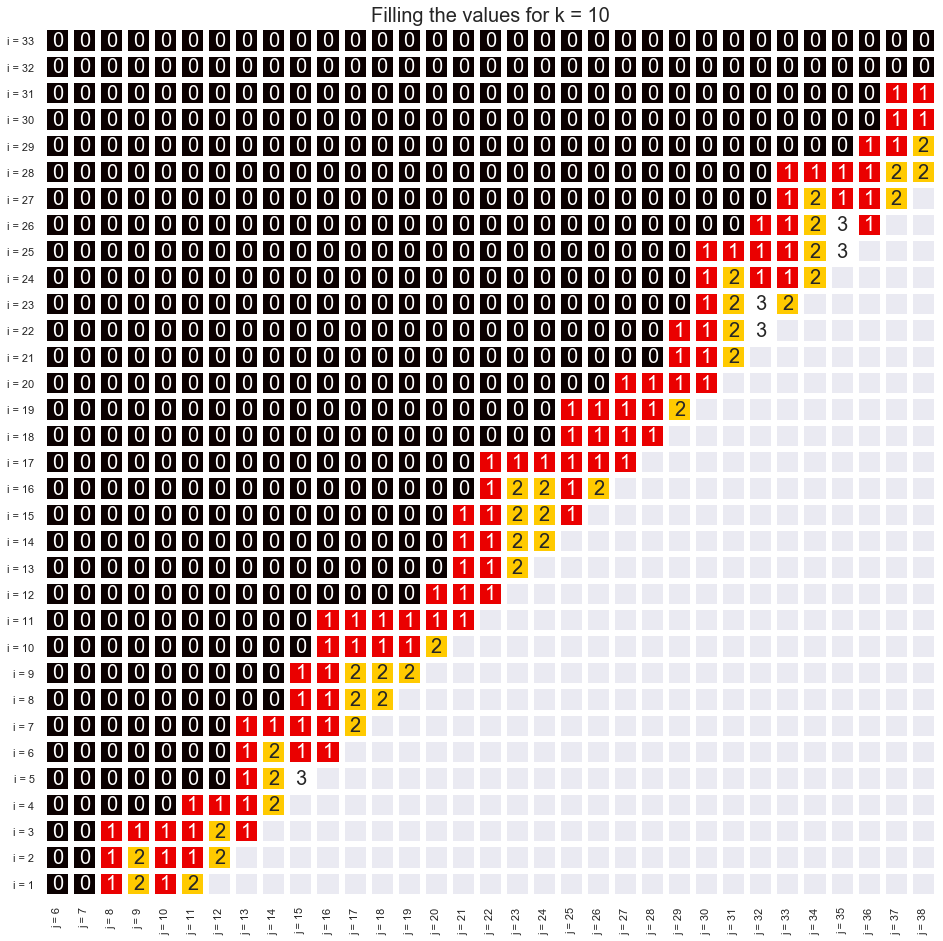

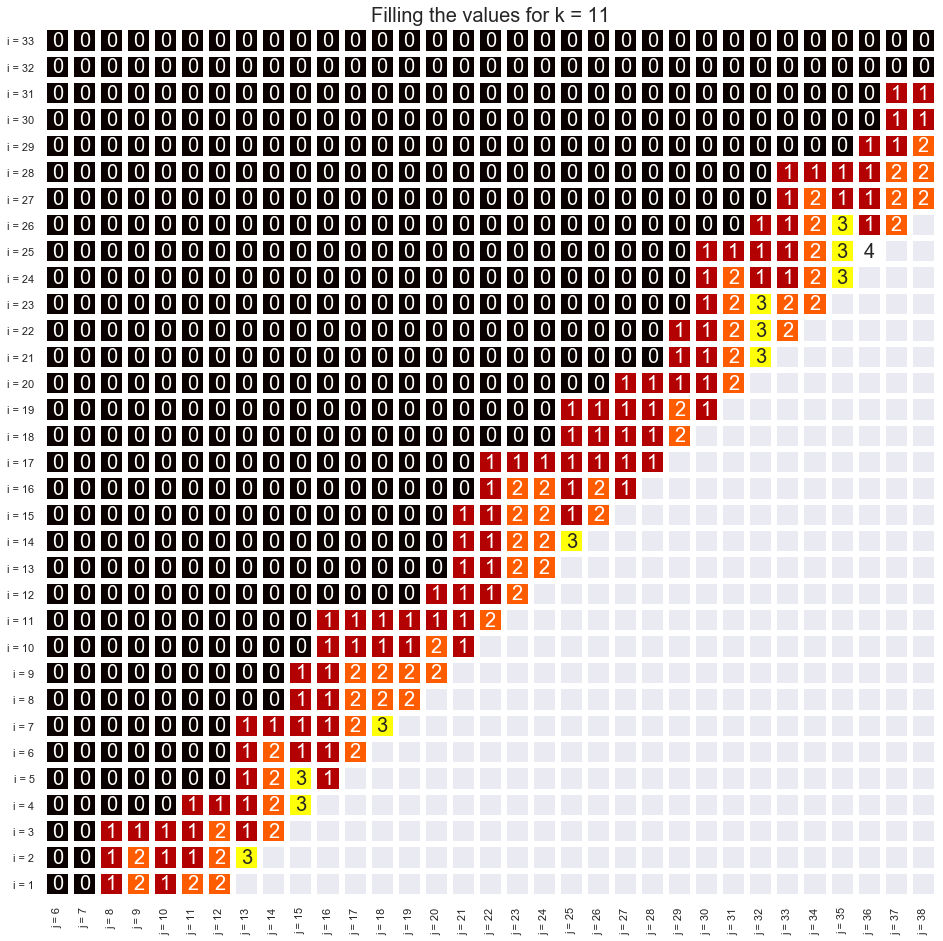

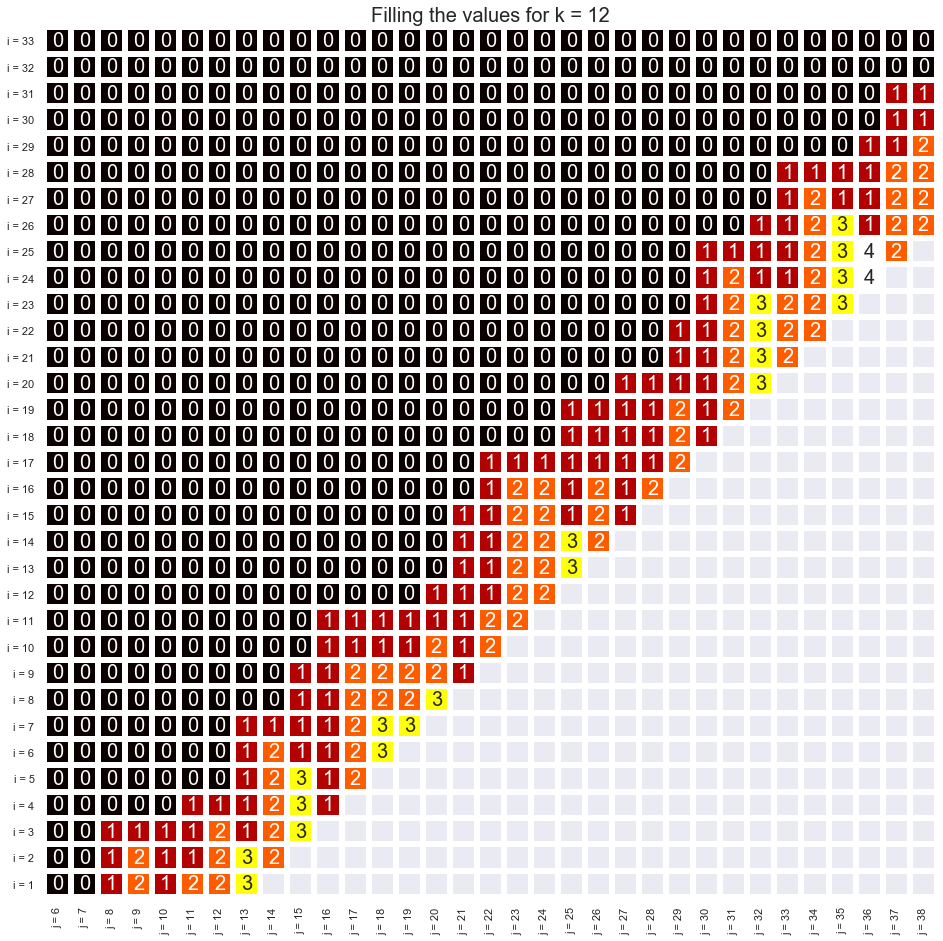

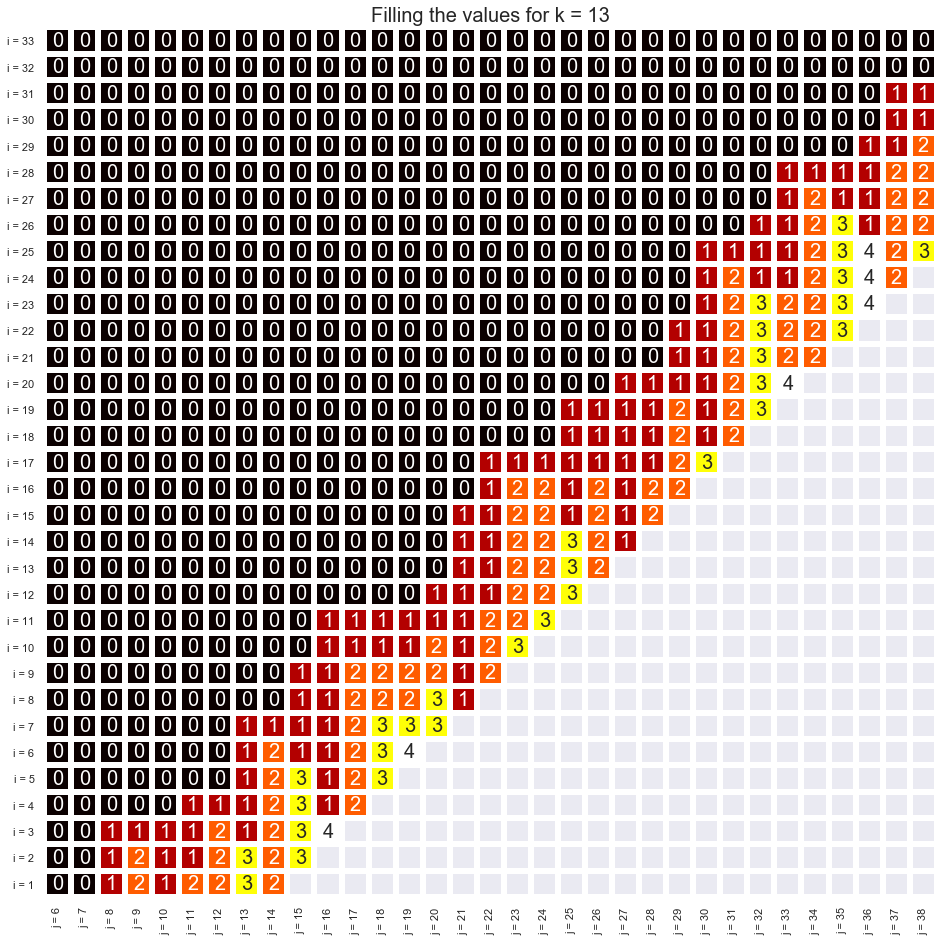

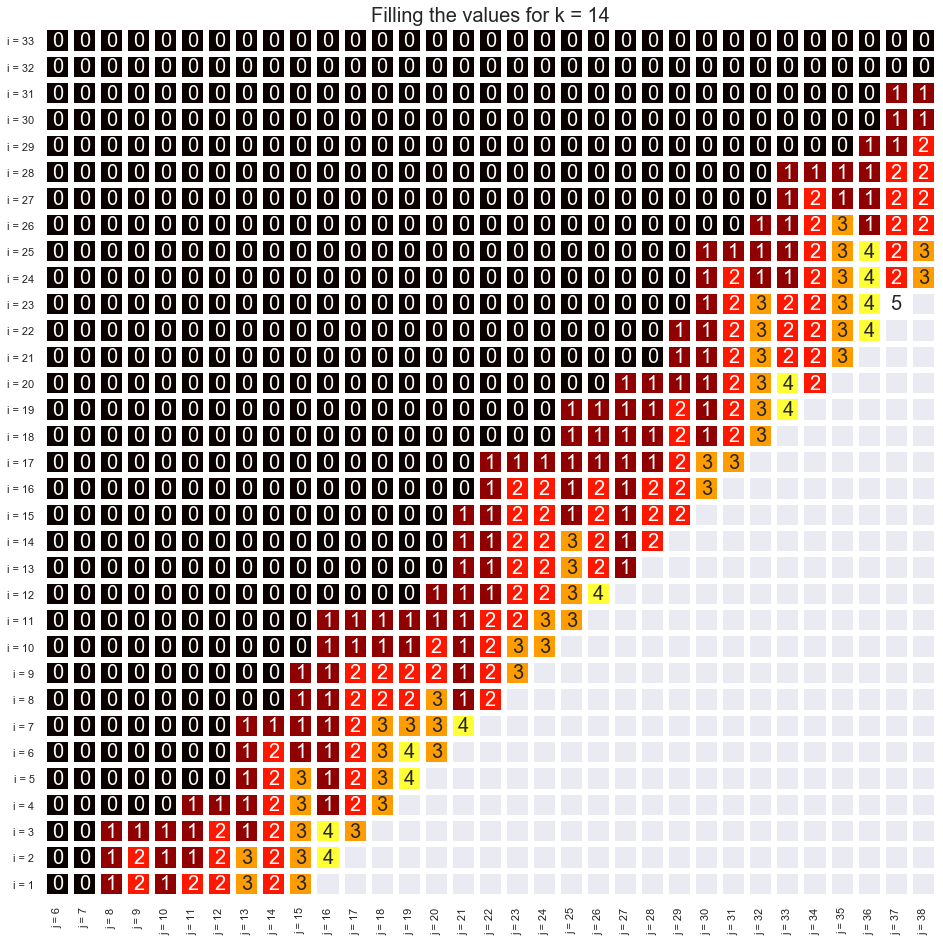

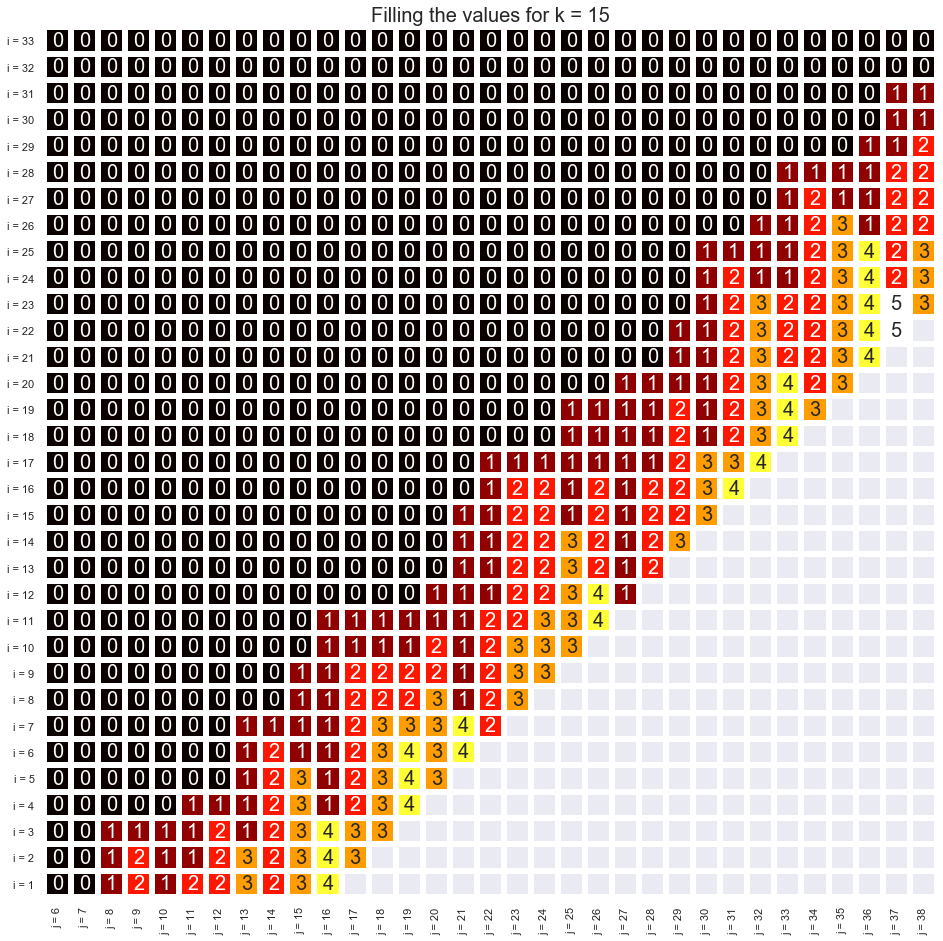

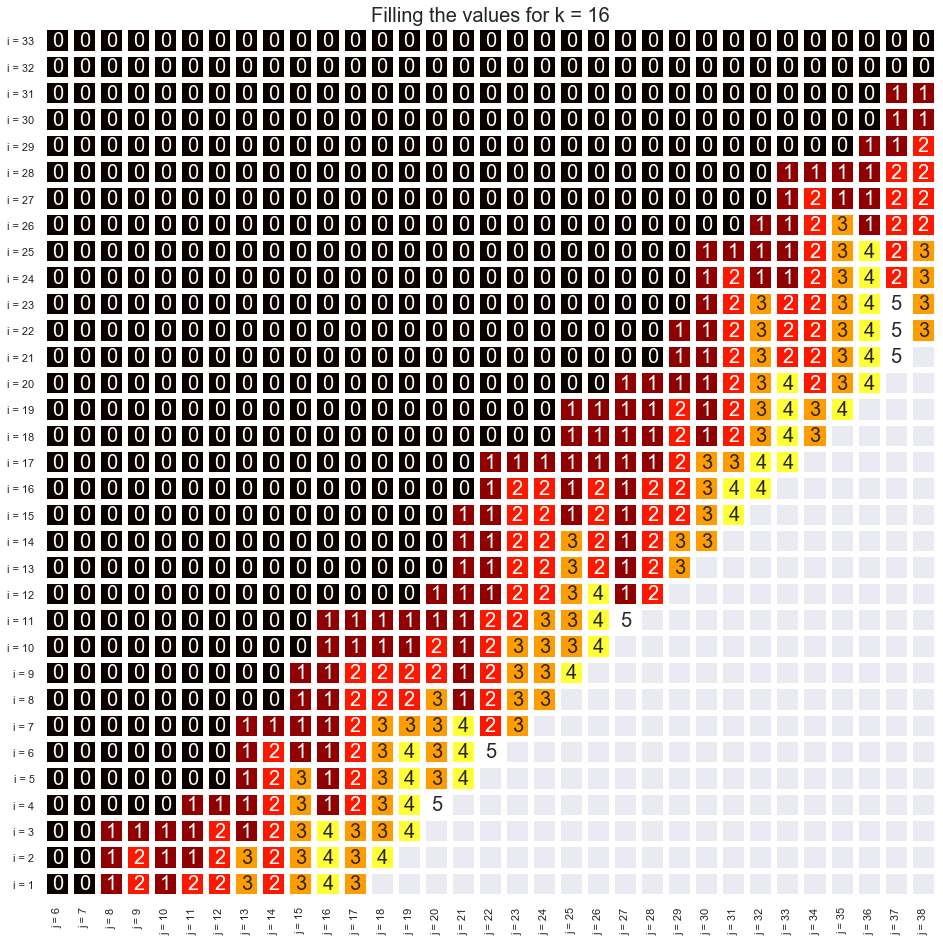

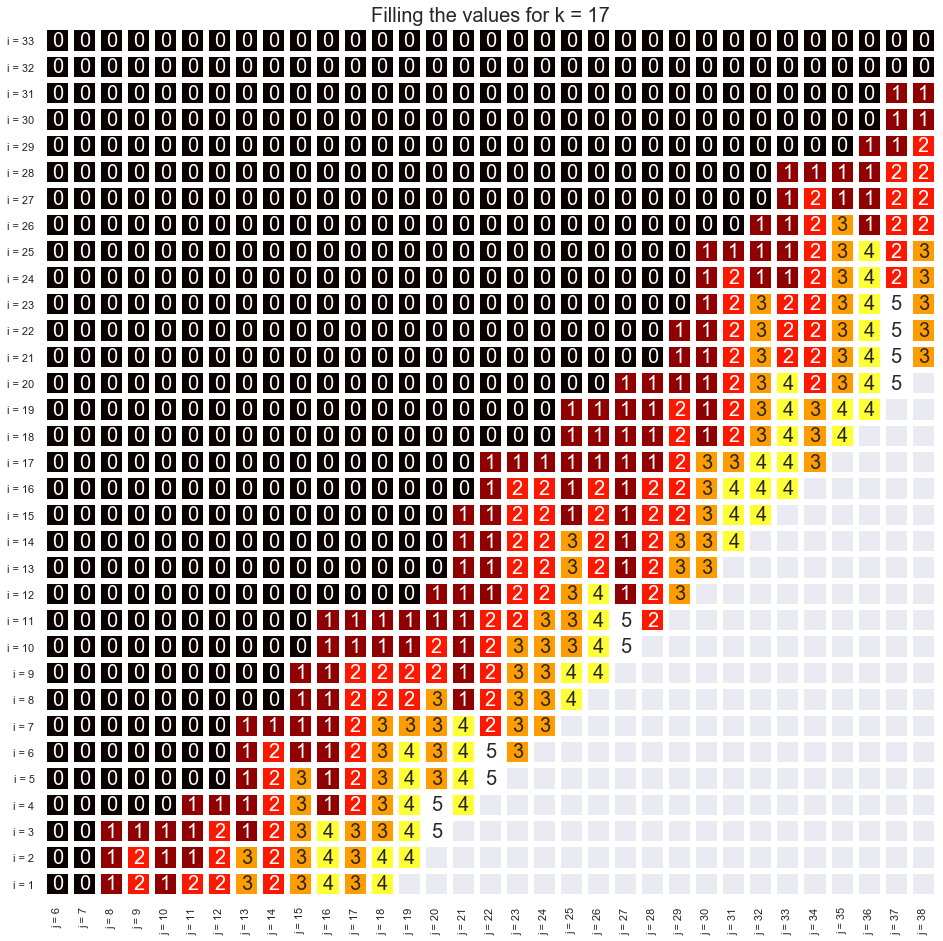

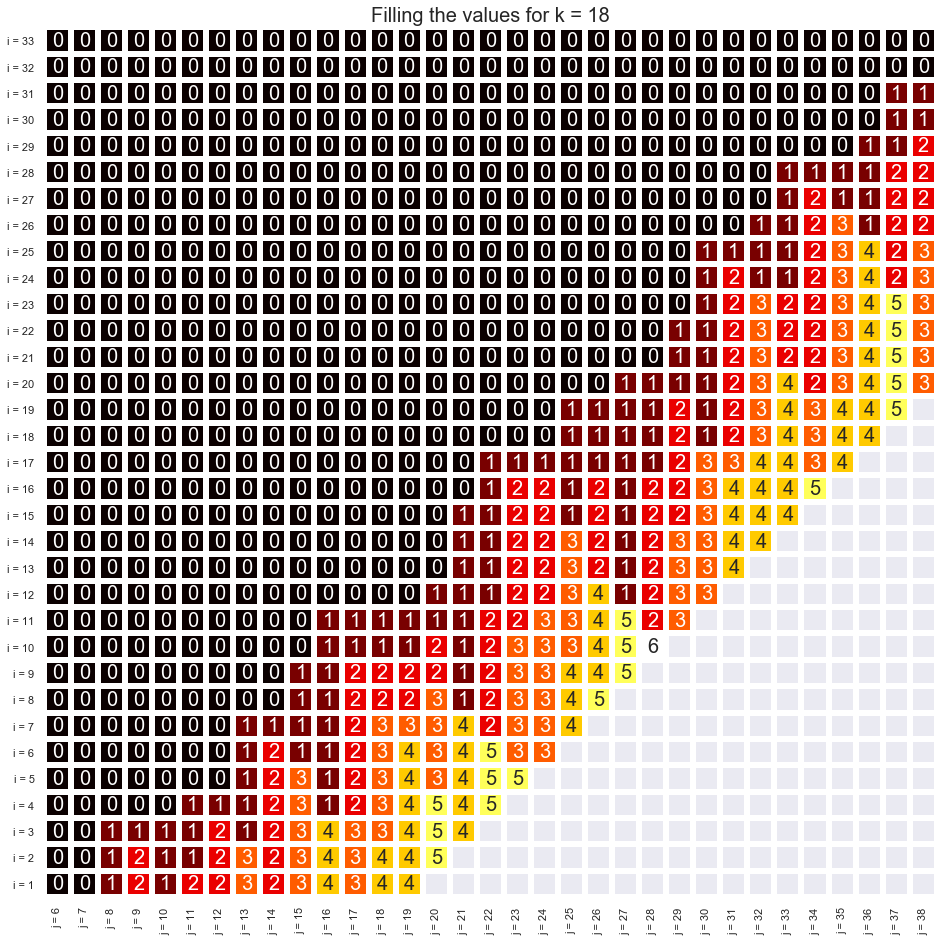

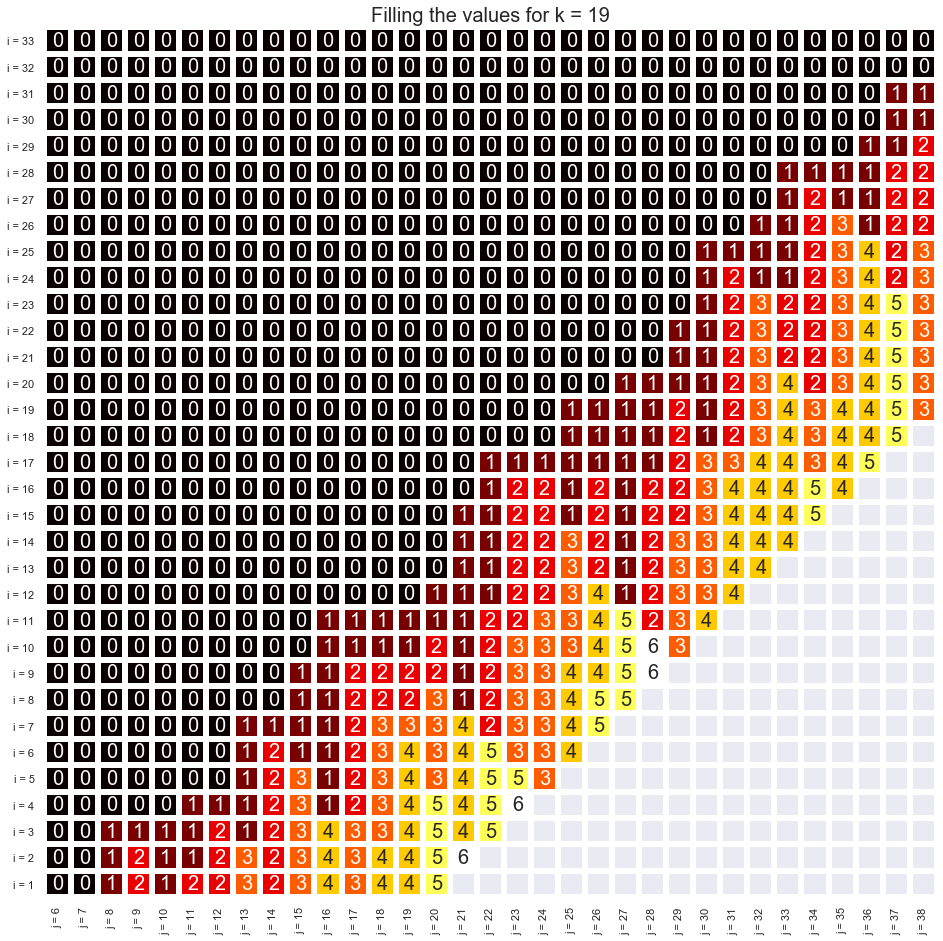

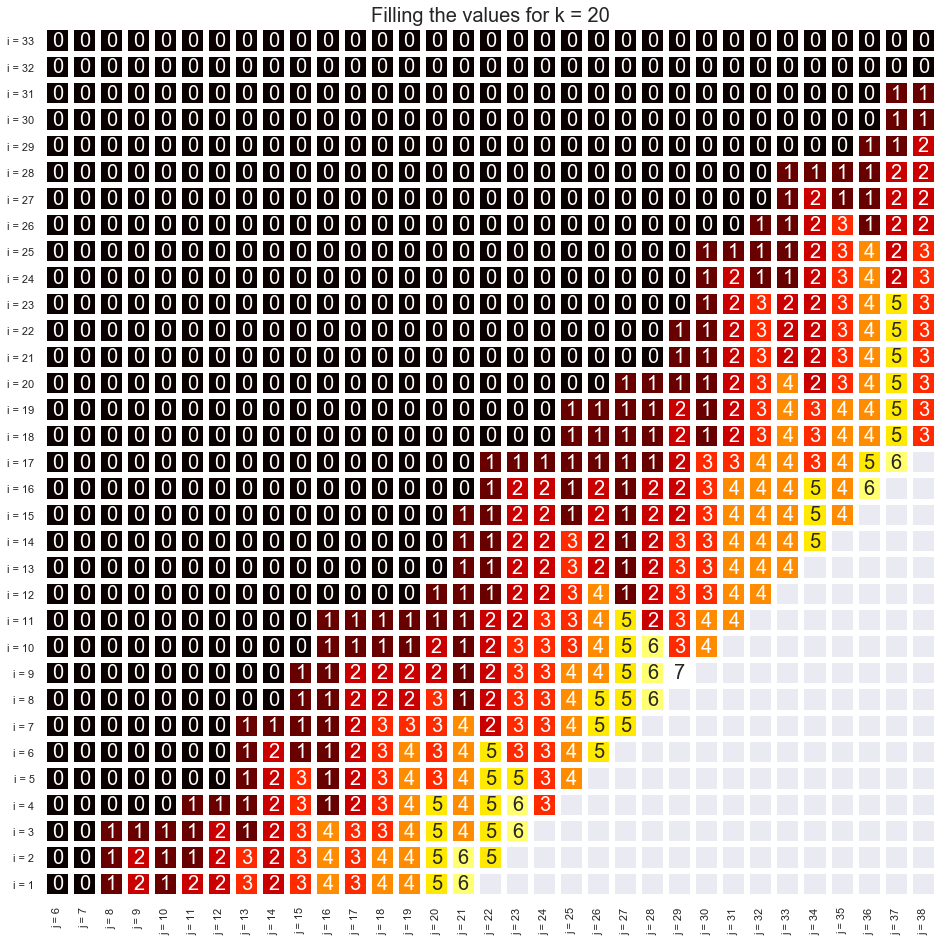

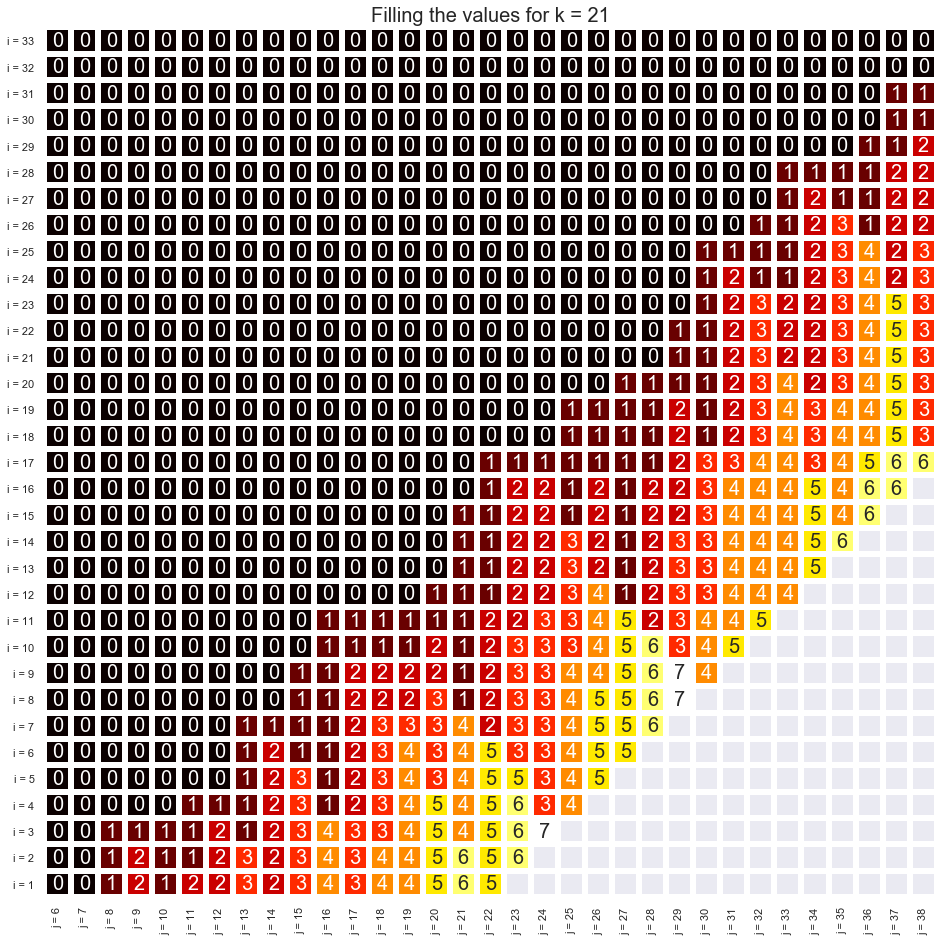

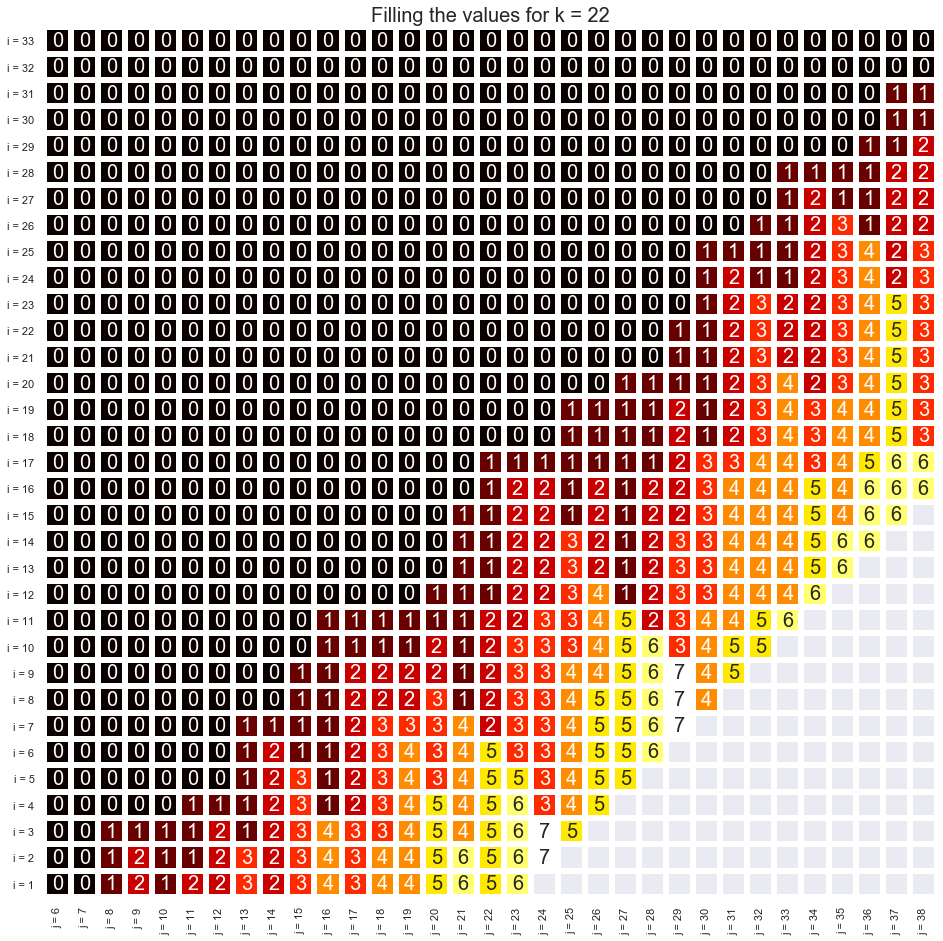

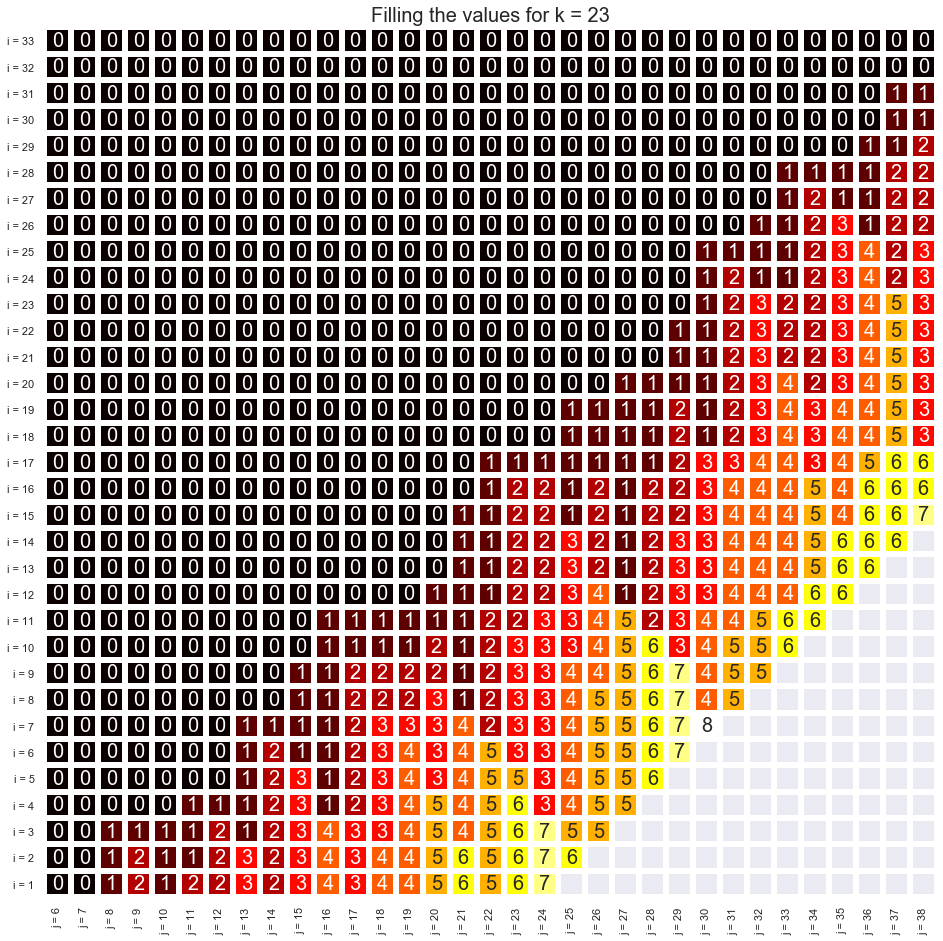

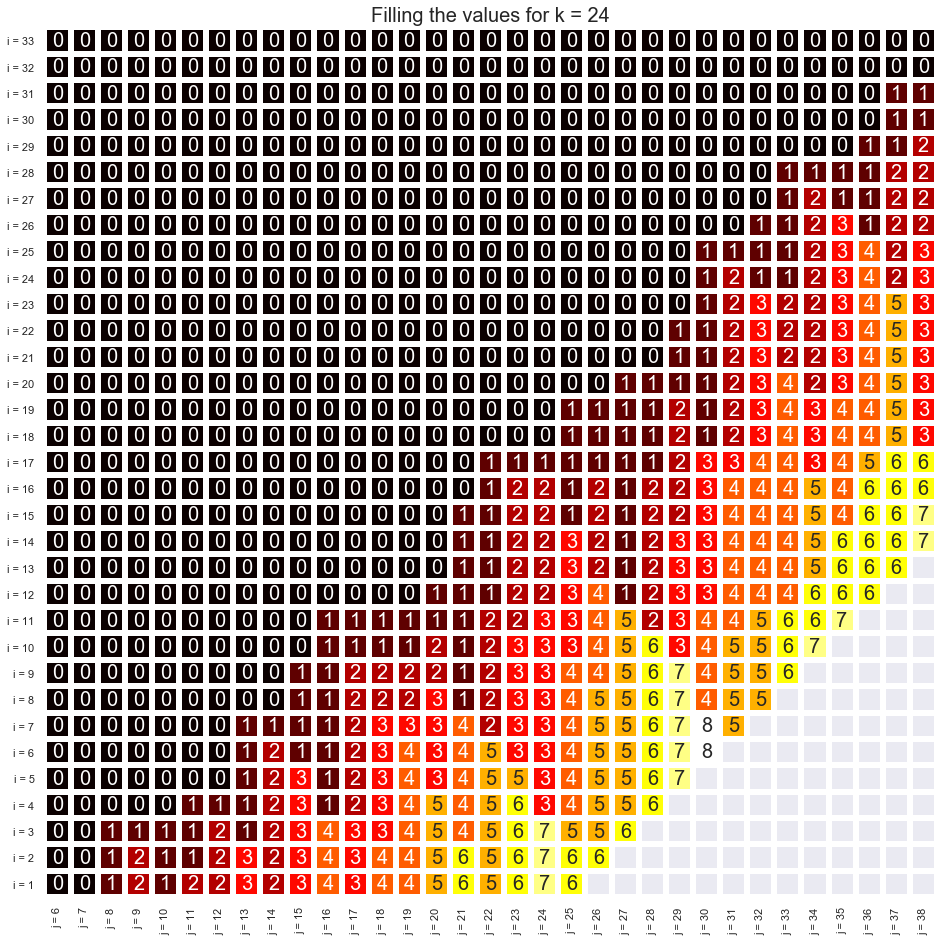

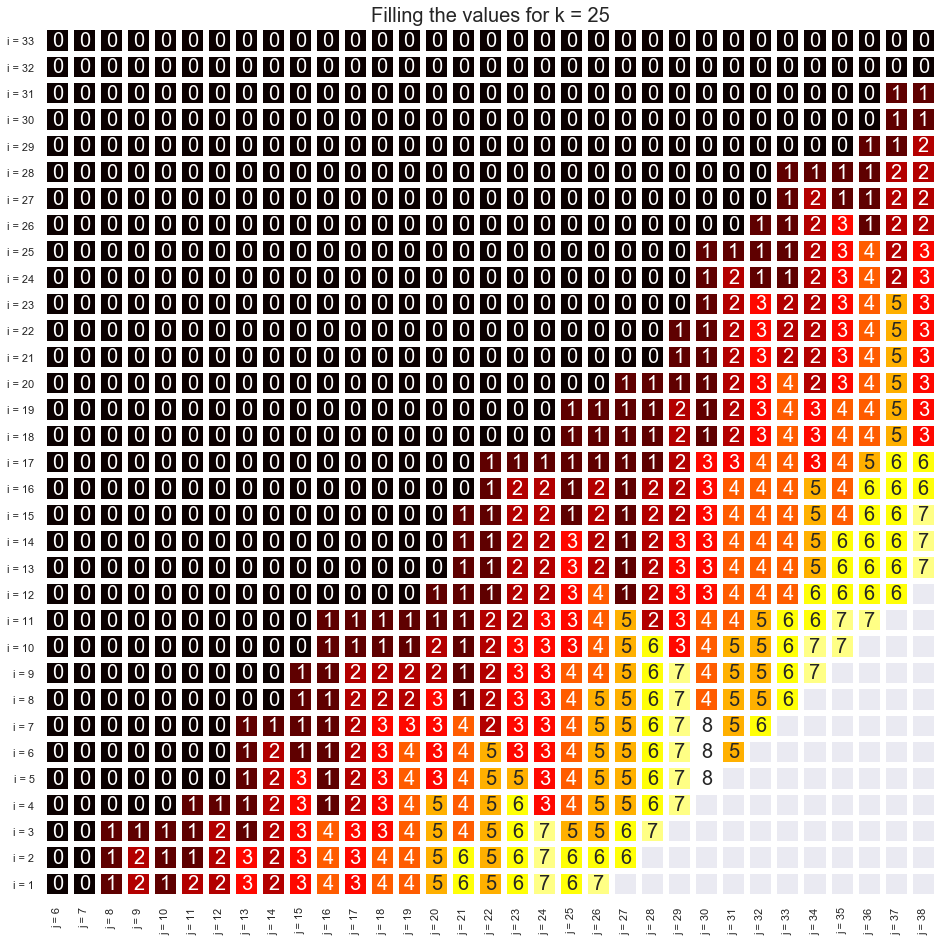

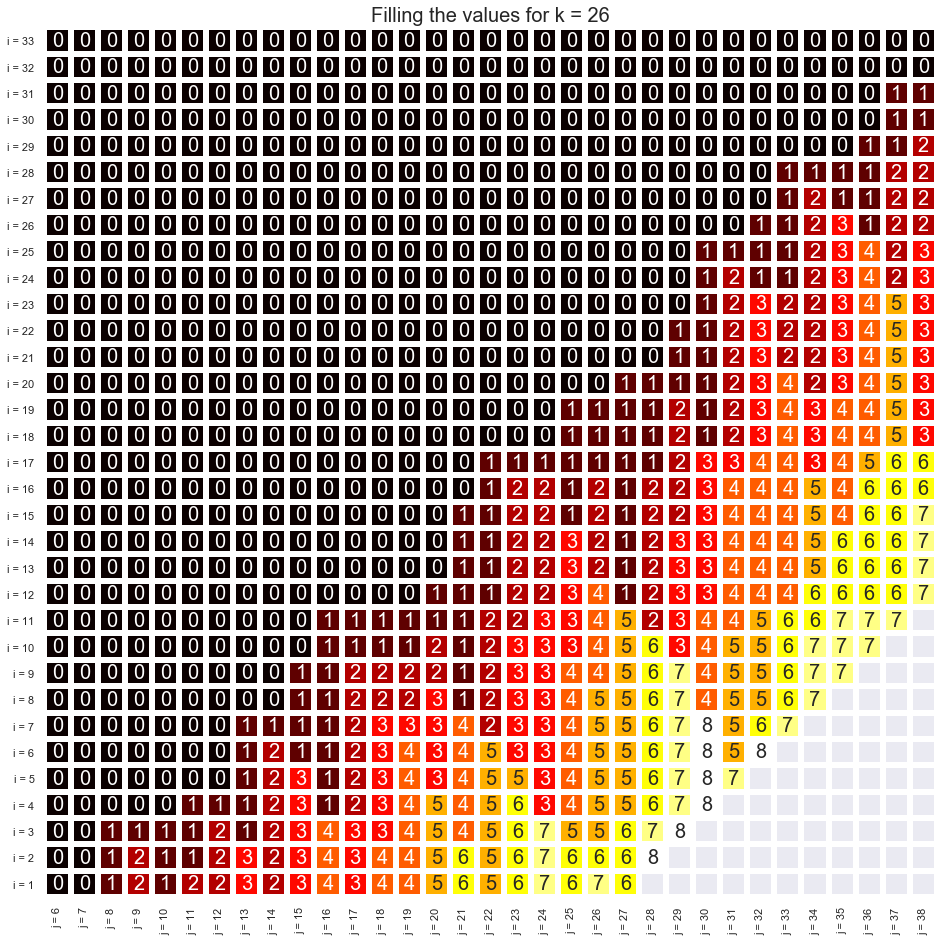

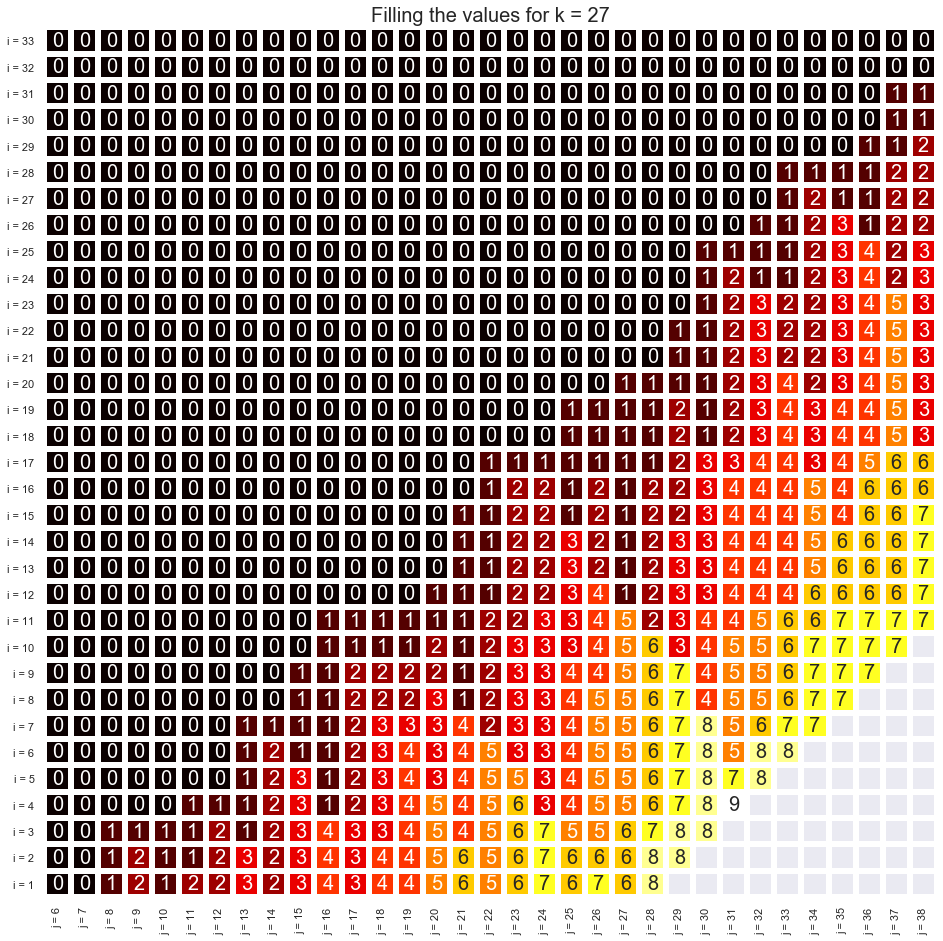

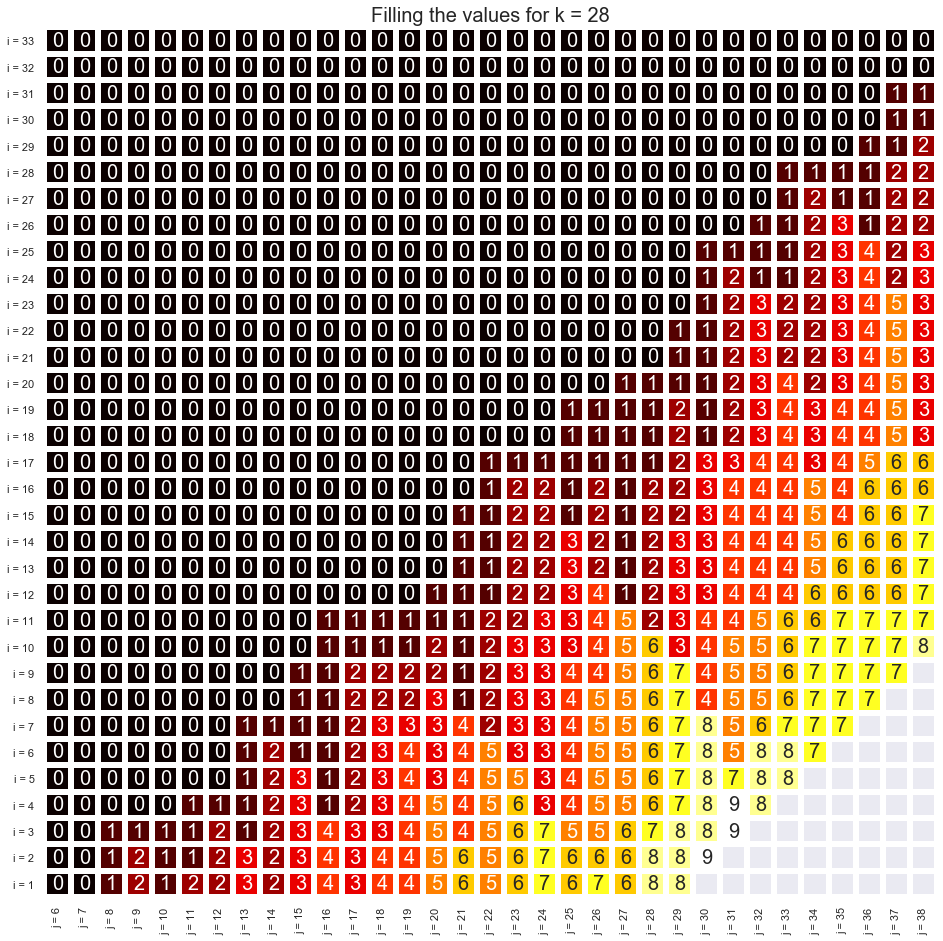

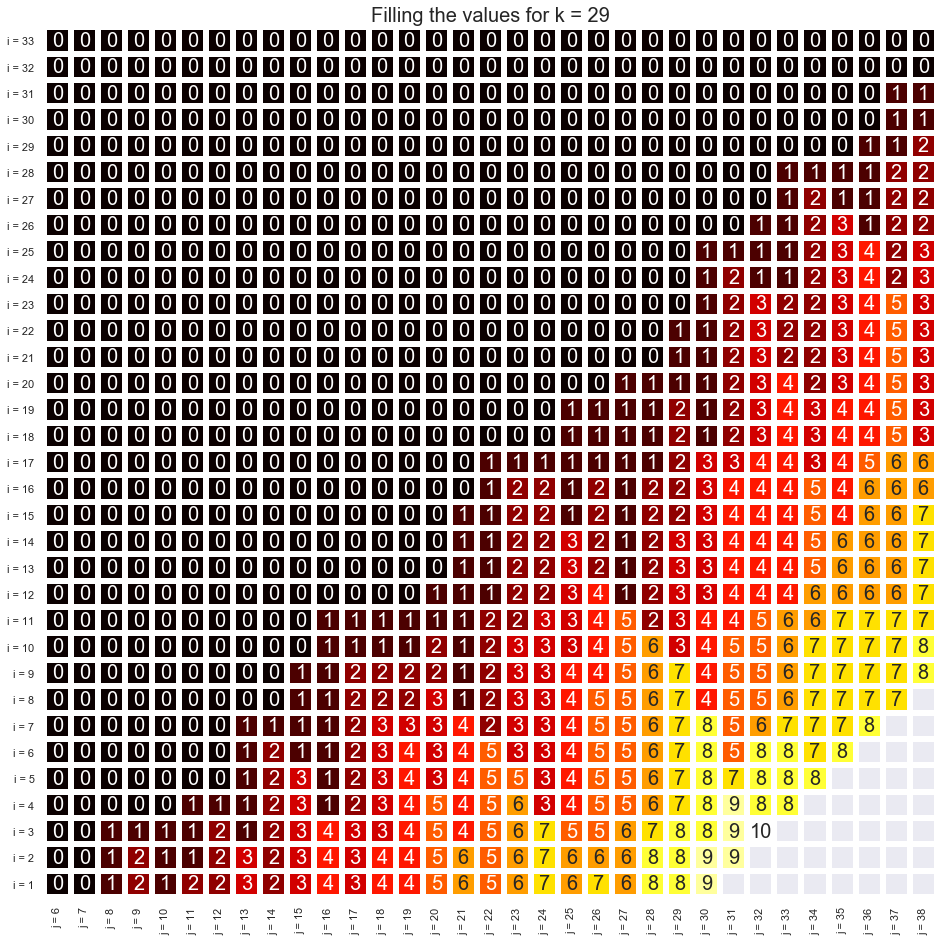

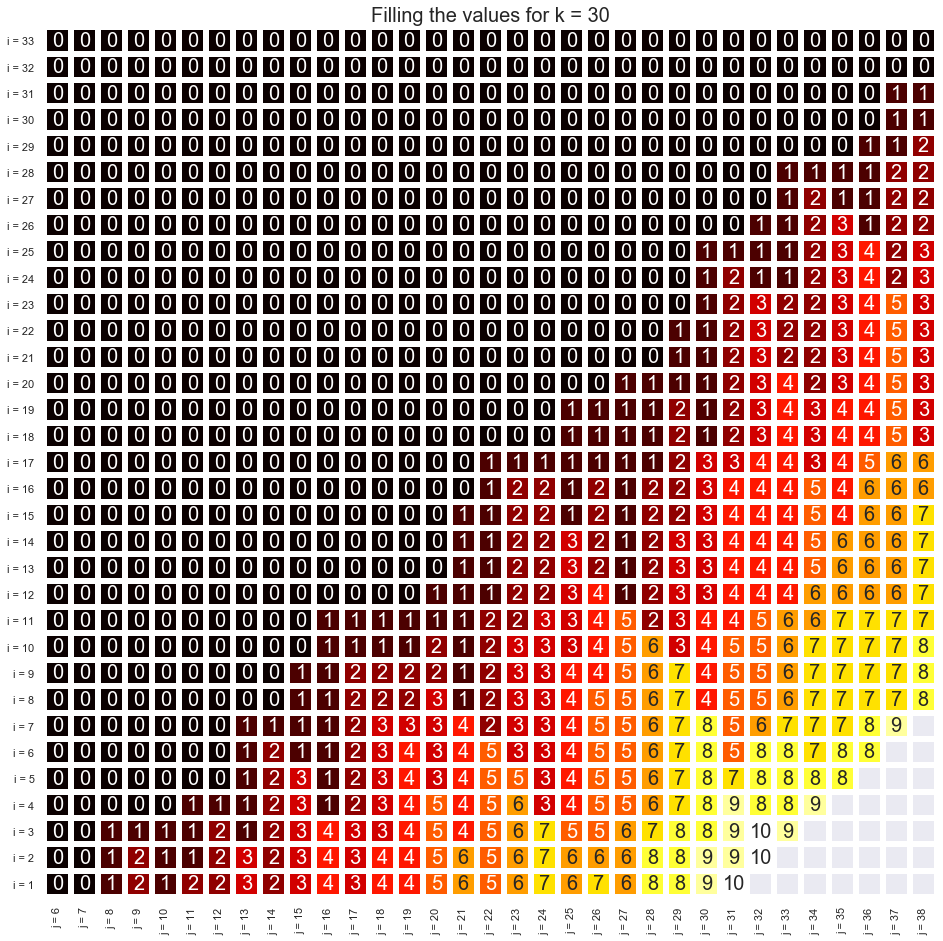

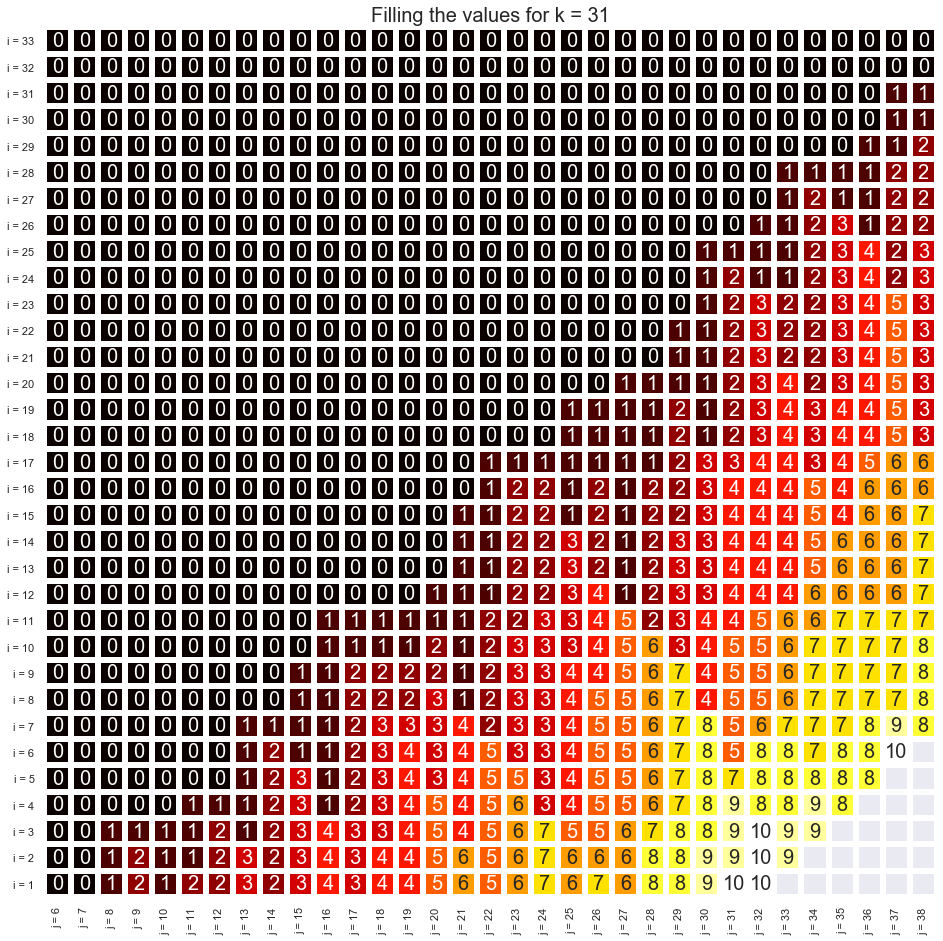

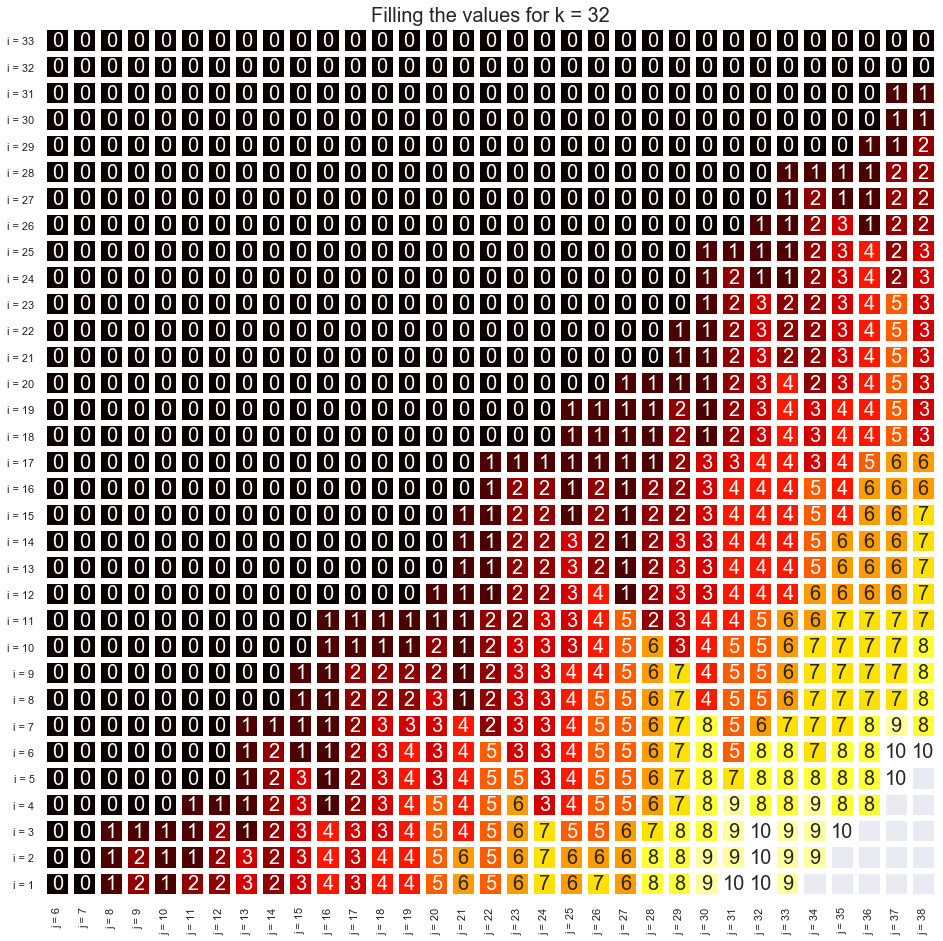

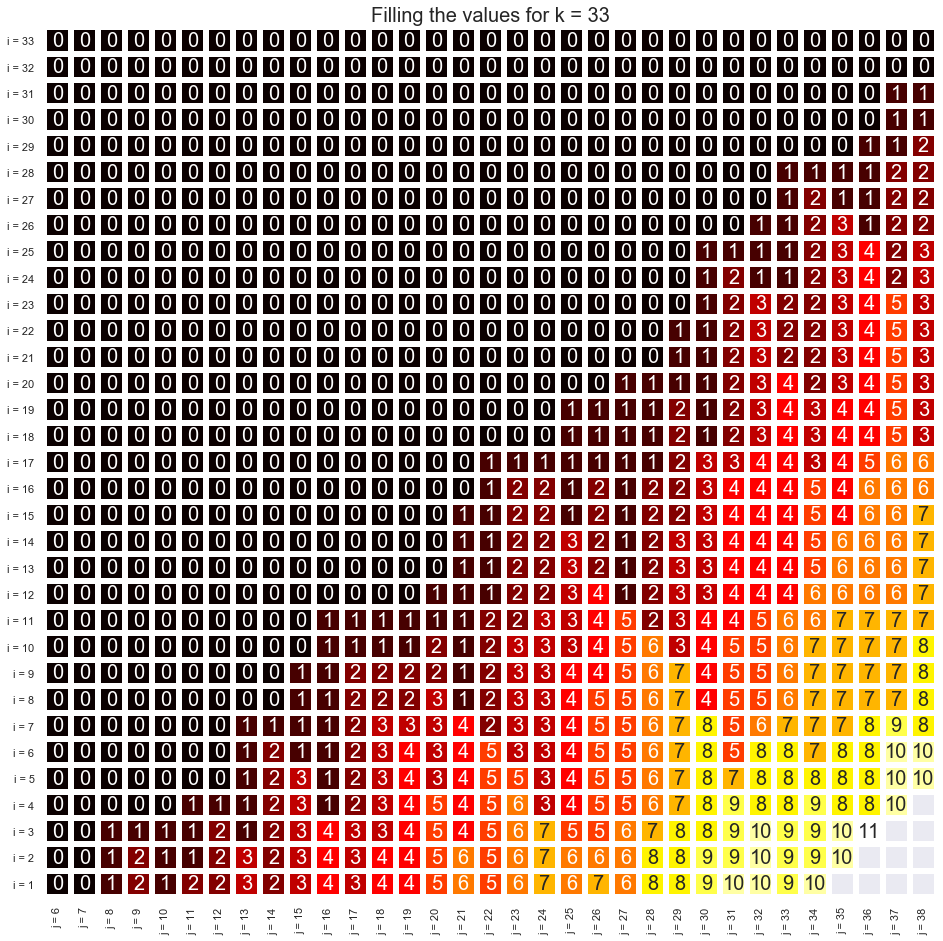

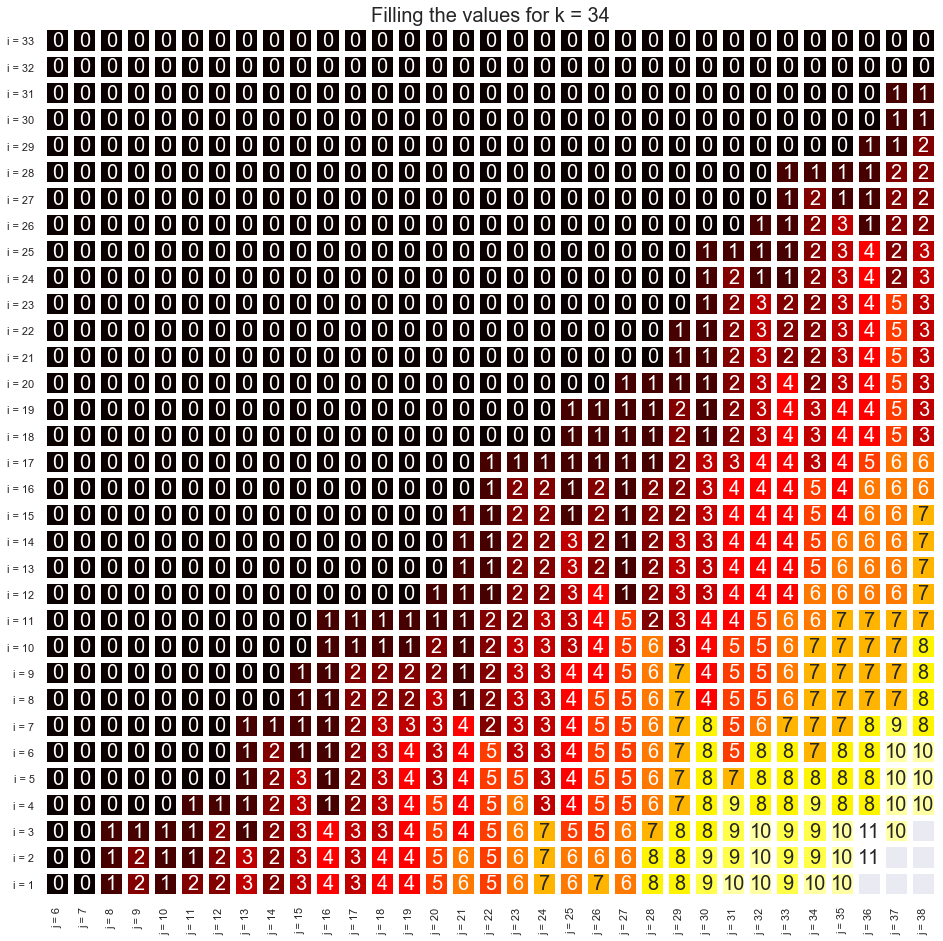

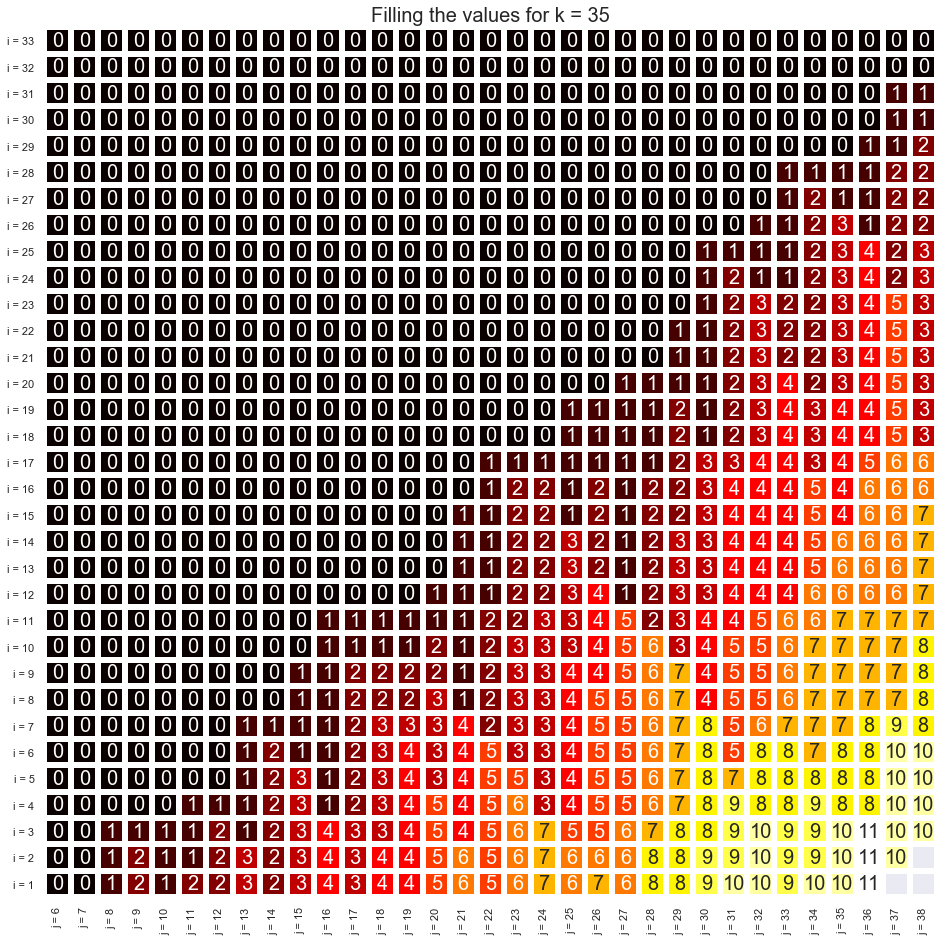

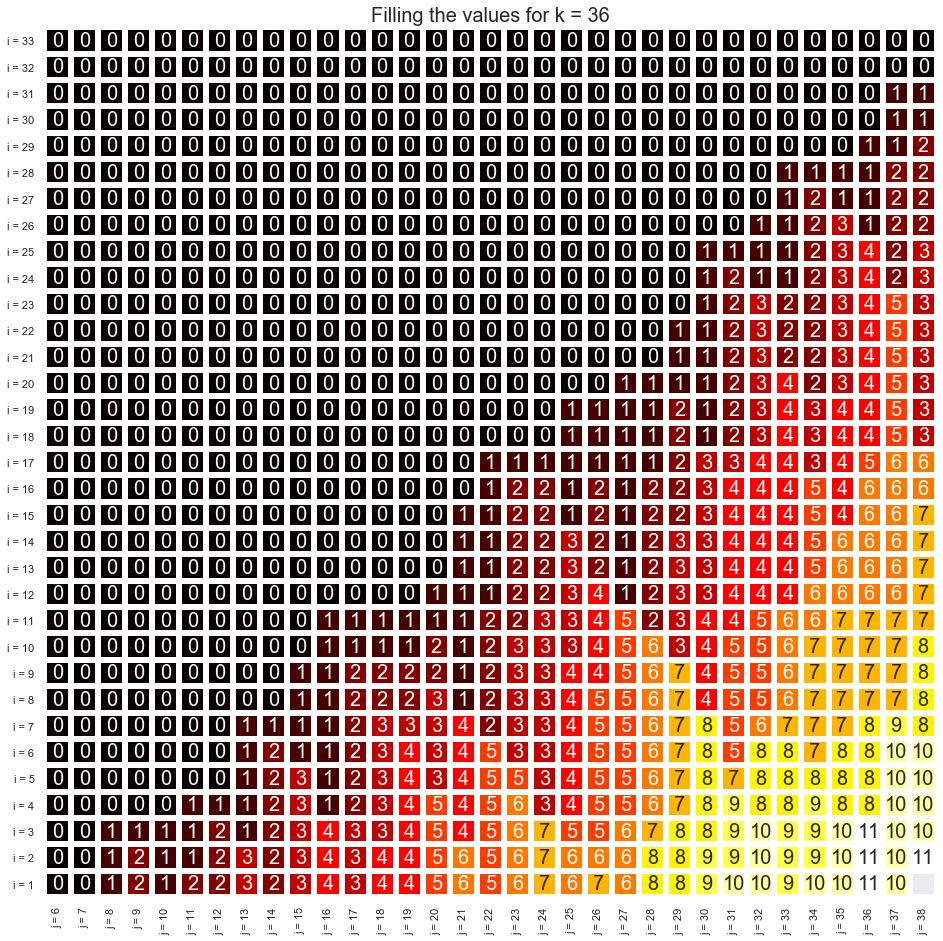

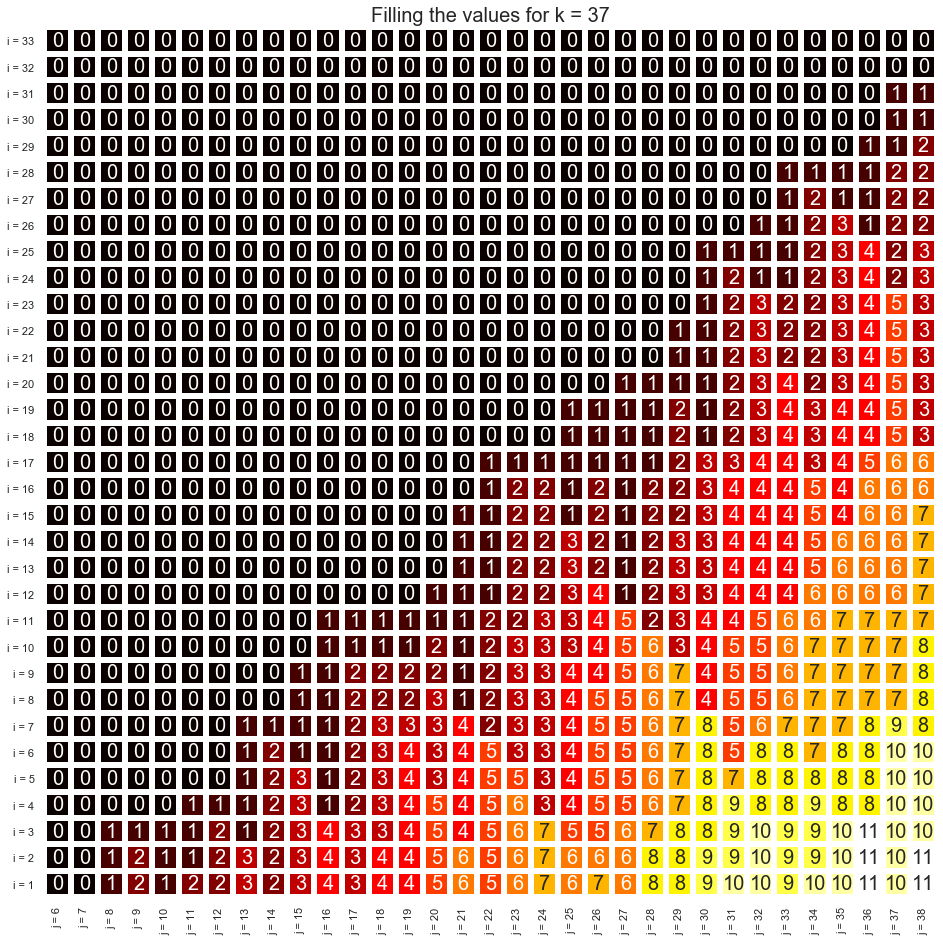

In [340]:
RNA_list = np.array((RNA_list))
n = len(RNA_list) - 1
val_2 = []
for k in range(4,n):
    print("\033[1m"+"For k = "+str(k+1)+ "\033[0m")
    for i in range(0,n-k):
        j = i + (k+1)
        print("OPT[i,j] = OPT[%d,%d]" %(i+1,j+1))
        if (RNA_list[j] == 'A'):
            t = list(np.where(RNA_list[i:j-4] == 'U')[0])
            t = [t+i for t in t]
            if (len(t) == 0):
                print("\t j is %d and j-th symbol is %s .j is not involved in the pair because no base-pair is found" %(j+1,RNA_list[j]))
                print("\t OPT[i,j] = OPT[i,j-1]")
                OPT[i,j] = OPT[i,j-1]
            else:
                print("\t j is %d and j-th symbol is %s .j pairs with t for t<j-4. recurrence on two subproblems OPT[i,t-1] and OPT[t+1,j-1]" %(j+1,RNA_list[j]))
                print("\t OPT[i,j] = max_t(1 + OPT[i,t-1] +OPT[t+1,j-1]")
                for t in t:
                    if (t-1 < 0):
                        val_2.append(1 + OPT[t+1,j-1])
                    else:
                        val_2.append(1 + OPT[i,t-1] + OPT[t+1,j-1])
                OPT[i,j] = max(val_2)
            val_2 = []
        elif (RNA_list[j] == 'U'):
            t = list(np.where(RNA_list[i:j-4] == 'A')[0])
            t = [t+i for t in t]
            if (len(t) == 0):
                print("\t j is %d and j-th symbol is %s .j is not involved in the pair because no base-pair is found" %(j+1,RNA_list[j]))
                print("\t OPT[i,j] = OPT[i,j-1]")
                OPT[i,j] = OPT[i,j-1]
            else:
                print("\t j is %d and j-th symbol is %s .j pairs with t for t<j-4. recurrence on two subproblems OPT[i,t-1] and OPT[t+1,j-1]" %(j+1,RNA_list[j]))
                print("\t OPT[i,j] = max_t(1 + OPT[i,t-1] +OPT[t+1,j-1]")
                for t in t:
                    if (t-1 < 0):
                        val_2.append(1 + OPT[t+1,j-1])
                    else:
                        val_2.append(1 + OPT[i,t-1] + OPT[t+1,j-1])
                OPT[i,j] = max(val_2)
            val_2 = []
        elif (RNA_list[j] == 'C'):
            t = list(np.where(RNA_list[i:j-4] == 'G')[0])
            t = [t+i for t in t]
            if (len(t) == 0):
                print("\t j is %d and j-th symbol is %s .j is not involved in the pair because no base-pair is found" %(j+1,RNA_list[j]))
                print("\t OPT[i,j] = OPT[i,j-1]")
                OPT[i,j] = OPT[i,j-1]
            else:
                print("\t j is %d and j-th symbol is %s .j pairs with t for t<j-4. recurrence on two subproblems OPT[i,t-1] and OPT[t+1,j-1]" %(j+1,RNA_list[j]))
                print("\t OPT[i,j] = max_t(1 + OPT[i,t-1] +OPT[t+1,j-1]")
                for t in t:
                    if (t-1 < 0):
                        val_2.append(1 + OPT[t+1,j-1])
                    else:
                        val_2.append(1 + OPT[i,t-1] + OPT[t+1,j-1])
                OPT[i,j] = max(val_2)
            val_2 = []
        elif (RNA_list[j] == 'G'):
            t = list(np.where(RNA_list[i:j-4] == 'C')[0])
            t = [t+i for t in t]
            if (len(t) == 0):
                print("\t j is %d and j-th symbol is %s .j is not involved in the pair because no base-pair is found" %(j+1,RNA_list[j]))
                print("\t OPT[i,j] = OPT[i,j-1]")
                OPT[i,j] = OPT[i,j-1]
            else:
                print("\t j is %d and j-th symbol is %s .j pairs with t for t<j-4. recurrence on two subproblems OPT[i,t-1] and OPT[t+1,j-1]" %(j+1,RNA_list[j]))
                print("\t OPT[i,j] = max_t(1 + OPT[i,t-1] +OPT[t+1,j-1]")
                for t in t:
                    if (t-1 < 0):
                        val_2.append(1 + OPT[t+1,j-1])
                    else:
                        val_2.append(1 + OPT[i,t-1] + OPT[t+1,j-1])
                OPT[i,j] = max(val_2)
            val_2 = []
    plot_map(OPT[len(RNA_list)-6::-1,5::1],np.nanmax(OPT),k+1,cmap = 'hot')
# plot_map(OPT[int(len(RNA_list)/2)+2::-1,int(len(RNA_list)/2):len(RNA_list):],np.amax(OPT),k+1)
display(Markdown(' <b> Maximum number of pairs possible in the RNA Structure : </b>'+str(OPT[0,len(RNA_list)-1])))
display(Markdown('<b> The iterations of the algorithm showing solutions to subproblems on the input sequence of the RNA Secondary Structure Prediction Problem </b>'))